In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

In [3]:
#importing data
data = pd.read_csv('agent_recruitment.csv')

In [4]:
#first 5 instances using "head()" function
data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [5]:
data.shape

(9527, 23)

In [6]:
data.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

# Missing Value Treatment

In [7]:
data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [8]:
(data.isnull().sum()/data.shape[0])*100

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

In [9]:
(data[['Manager_DOJ','Manager_Joining_Designation','Manager_Grade','Manager_Status','Manager_Gender','Manager_DoB',
       'Manager_Num_Application','Manager_Num_Coded','Manager_Business','Manager_Num_Products','Manager_Business2',
       'Manager_Num_Products2', 'Manager_Current_Designation',]].loc[(data['Manager_Current_Designation'].isnull()>0)])

,Manager_DOJ,Manager_Joining_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Manager_Current_Designation
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Total 683 similar rows are empty for the above columns

In [10]:
# looking at rows where Manager_doj is null(same for all columns) and sourced is 1
sourced_1 = data.loc[(data.Manager_DOJ.isnull()) & (data.Business_Sourced == 1)]
sourced_1

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
24,FIN1000025,209625,4/16/2007,205262.0,M,7/13/1982,S,Business,Class XII,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
34,FIN1000035,851101,4/16/2007,851120.0,M,5/4/1970,M,Business,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
83,FIN1000084,284001,4/17/2007,284403.0,M,9/6/1986,S,Others,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
84,FIN1000085,851101,4/17/2007,851127.0,M,1/30/1985,S,Business,Class XII,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
86,FIN1000087,209625,4/17/2007,205262.0,M,12/3/1981,S,Business,Class XII,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9451,FIN1009452,843302,6/26/2008,843323.0,M,12/2/1965,M,Others,Class XII,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9454,FIN1009455,841226,6/26/2008,841239.0,M,1/6/1976,M,Salaried,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9483,FIN1009484,476001,6/28/2008,476001.0,M,4/10/1983,M,Business,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9486,FIN1009487,476001,6/28/2008,474012.0,M,9/19/1944,M,Others,Class XII,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


* Out of 683 rows with managers data missing 448 rows  counts for business sourced as 0 and 236 counts for business sourced as 1

In [11]:
# finding most empty rows in our dataset
most_empty_rows = data.loc[(data.Manager_DOJ.isnull()) & (data.Applicant_City_PIN.isnull()) & (data.Applicant_Gender.isnull())]
most_empty_rows

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
595,FIN1000596,636004,5/1/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
847,FIN1000848,700016,5/7/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1169,FIN1001170,700016,5/10/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3784,FIN1003785,814112,9/14/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4020,FIN1004021,800001,9/26/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4398,FIN1004399,686004,10/18/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4559,FIN1004560,802301,10/27/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4855,FIN1004856,250001,11/9/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5208,FIN1005209,851101,11/17/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5269,FIN1005270,221010,11/19/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


we can see that here more than 70% details in the rows are empty and business sourced is 0 so we can remove these rows

In [12]:
# removing these 14 rows
data = data.dropna(thresh = 8)

In [13]:
# dropping the rows where business sourced is 0 and manager details are not present 
data.drop(data.loc[(data.Manager_DOJ.isnull()) & (data.Business_Sourced == 0)].index, inplace = True)

In [14]:
data.shape

(9080, 23)

In [15]:
# now looking at rows where doj is null and applicant occupation is also null and also gender and sourced is 1
sourced_2 = data.loc[(data.Manager_DOJ.isnull()) & (data.Applicant_Gender.isnull()) & (data.Applicant_Occupation.isnull()) &
                     (data.Business_Sourced == 1)]
sourced_2

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced


In [16]:
data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               81
Applicant_Gender                 53
Applicant_BirthDate              59
Applicant_Marital_Status         59
Applicant_Occupation           1134
Applicant_Qualification          71
Manager_DOJ                     236
Manager_Joining_Designation     236
Manager_Current_Designation     236
Manager_Grade                   236
Manager_Status                  236
Manager_Gender                  236
Manager_DoB                     236
Manager_Num_Application         236
Manager_Num_Coded               236
Manager_Business                236
Manager_Num_Products            236
Manager_Business2               236
Manager_Num_Products2           236
Business_Sourced                  0
dtype: int64

### Imputing the missing values left in our data

In [17]:
##imputing the missing values with central tendency
data['Applicant_Gender'].fillna(data['Applicant_Gender'].mode()[0], inplace = True)
data['Applicant_Marital_Status'].fillna(data['Applicant_Marital_Status'].mode()[0], inplace = True)
data['Applicant_Occupation'].fillna(data['Applicant_Occupation'].mode()[0], inplace = True)
data['Applicant_Qualification'].fillna(data['Applicant_Qualification'].mode()[0], inplace = True)
data['Manager_Joining_Designation'].fillna(data['Manager_Joining_Designation'].mode()[0], inplace = True)
data['Manager_Grade'].fillna(data['Manager_Grade'].mode()[0], inplace = True)
data['Manager_Current_Designation'].fillna(data['Manager_Current_Designation'].mode()[0], inplace = True)
data['Manager_Status'].fillna(data['Manager_Status'].mode()[0], inplace = True)
data['Manager_Gender'].fillna(data['Manager_Gender'].mode()[0], inplace = True)
data['Manager_Num_Application'].fillna(data['Manager_Num_Application'].mean(), inplace = True)
data['Manager_Num_Coded'].fillna(data['Manager_Num_Coded'].mean(), inplace = True)
data['Manager_Business'].fillna(data['Manager_Business'].mean(), inplace = True)
data['Manager_Num_Products'].fillna(data['Manager_Num_Products'].mean(), inplace = True)
data['Manager_Business2'].fillna(data['Manager_Business2'].mean(), inplace = True)
data['Manager_Num_Products2'].fillna(data['Manager_Num_Products2'].mean(), inplace = True)


In [18]:
# replacing NaN values in applicant pincode with 999999
data['Applicant_City_PIN'] = data['Applicant_City_PIN'].fillna(value=999999)

In [19]:
# filling missing values of datetime varaibles as 9/9/9999
data['Applicant_BirthDate'] = data['Applicant_BirthDate'].fillna(value='04/11/2262')
data['Manager_DOJ'] = data['Manager_DOJ'].fillna(value='04/11/2262')
data['Manager_DoB'] = data['Manager_DoB'].fillna(value='04/11/2262')

In [20]:
data['Manager_DOJ'].unique()

array(['11/10/2005', '5/27/2006', '8/21/2003', '5/8/2006', '1/17/2006',
       '9/1/2003', '12/16/2006', '11/18/2004', '8/15/2002', '9/16/2004',
       '6/19/2006', '4/30/2004', '1/8/2004', '6/20/2006', '3/1/2005',
       '11/18/2002', '10/13/2006', '7/21/2006', '11/3/2006', '2/21/2007',
       '1/30/2004', '10/30/2003', '6/27/2006', '04/11/2262', '10/5/2006',
       '5/29/2003', '3/6/2006', '5/26/2006', '5/25/2006', '6/8/2006',
       '5/12/2006', '7/22/2002', '10/15/2005', '4/12/2007', '2/16/2005',
       '1/17/2005', '7/31/2006', '12/20/2004', '12/29/2005', '5/31/2006',
       '2/16/2006', '10/23/2006', '10/25/2005', '6/13/2006', '8/21/2006',
       '11/3/2001', '8/7/2003', '4/29/2004', '1/13/2007', '9/2/2002',
       '6/16/2005', '11/4/2002', '8/2/2006', '1/10/2007', '5/22/2006',
       '9/22/2006', '10/20/2005', '11/7/2005', '7/28/2003', '1/16/2006',
       '11/4/2004', '2/24/2007', '8/4/2003', '10/9/2006', '9/25/2003',
       '8/3/2006', '6/6/2006', '9/5/2006', '11/15/2006', '9/1

In [21]:
data.isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

## Variable identification and typecasting

In [22]:
# A closer look at the data types present in the data
data.dtypes

ID                              object
Office_PIN                       int64
Application_Receipt_Date        object
Applicant_City_PIN             float64
Applicant_Gender                object
Applicant_BirthDate             object
Applicant_Marital_Status        object
Applicant_Occupation            object
Applicant_Qualification         object
Manager_DOJ                     object
Manager_Joining_Designation     object
Manager_Current_Designation     object
Manager_Grade                  float64
Manager_Status                  object
Manager_Gender                  object
Manager_DoB                     object
Manager_Num_Application        float64
Manager_Num_Coded              float64
Manager_Business               float64
Manager_Num_Products           float64
Manager_Business2              float64
Manager_Num_Products2          float64
Business_Sourced                 int64
dtype: object

In [23]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

Office_PIN          int64
Business_Sourced    int64
dtype: object

In [24]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

Applicant_City_PIN         float64
Manager_Grade              float64
Manager_Num_Application    float64
Manager_Num_Coded          float64
Manager_Business           float64
Manager_Num_Products       float64
Manager_Business2          float64
Manager_Num_Products2      float64
dtype: object

* Applicant_City_PIN is pincode it can't be float type we should convert it into int
* Manager_Grade can't be float convert it to int
* Manager_Num_Application can't be float type we should convert it into int
* Manager_Num_Coded can't be float type we should convert it into int
* Manager_Num_Products can't be float type we should convert it into int
* Manager_Num_Products2 can't be float type we should convert it into int
-------------------------------------------------------------------------------------------------------------------
* Manager_Business & Manager_Business2 is the business done by manager it can be in float 

In [25]:
# converting data to int
data['Applicant_City_PIN'] = data['Applicant_City_PIN'].astype('int64')
data['Manager_Grade'] = data['Manager_Grade'].astype('int64')
data['Manager_Num_Application'] = data['Manager_Num_Application'].astype('int64')
data['Manager_Num_Coded'] = data['Manager_Num_Coded'].astype('int64')
data['Manager_Num_Products'] = data['Manager_Num_Products'].astype('int64')
data['Manager_Num_Products2'] = data['Manager_Num_Products2'].astype('int64')
data.dtypes[data.dtypes == 'int64']

Office_PIN                 int64
Applicant_City_PIN         int64
Manager_Grade              int64
Manager_Num_Application    int64
Manager_Num_Coded          int64
Manager_Num_Products       int64
Manager_Num_Products2      int64
Business_Sourced           int64
dtype: object

In [26]:
# Identifying variables with object datatype
data.dtypes[data.dtypes == 'object']

ID                             object
Application_Receipt_Date       object
Applicant_Gender               object
Applicant_BirthDate            object
Applicant_Marital_Status       object
Applicant_Occupation           object
Applicant_Qualification        object
Manager_DOJ                    object
Manager_Joining_Designation    object
Manager_Current_Designation    object
Manager_Status                 object
Manager_Gender                 object
Manager_DoB                    object
dtype: object

In [27]:
#Typecasting the object variables to categoriy
data['ID'] = data['ID'].astype('category')
data['Applicant_Gender'] = data['Applicant_Gender'].astype('category')
data['Applicant_Marital_Status'] = data['Applicant_Marital_Status'].astype('category')
data['Applicant_Occupation'] = data['Applicant_Occupation'].astype('category')
data['Applicant_Qualification'] = data['Applicant_Qualification'].astype('category')
data['Manager_Joining_Designation'] = data['Manager_Joining_Designation'].astype('category')
data['Manager_Current_Designation'] = data['Manager_Current_Designation'].astype('category')
data['Manager_Status'] = data['Manager_Status'].astype('category')
data['Manager_Gender'] = data['Manager_Gender'].astype('category')
data['Business_Sourced'] = data['Business_Sourced'].astype('category')

In [28]:
## converting object variables to datetime
data[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ","Manager_DoB"]] = data[["Application_Receipt_Date", "Applicant_BirthDate", "Manager_DOJ","Manager_DoB"]].apply(pd.to_datetime)

In [29]:
data.dtypes

ID                                   category
Office_PIN                              int64
Application_Receipt_Date       datetime64[ns]
Applicant_City_PIN                      int64
Applicant_Gender                     category
Applicant_BirthDate            datetime64[ns]
Applicant_Marital_Status             category
Applicant_Occupation                 category
Applicant_Qualification              category
Manager_DOJ                    datetime64[ns]
Manager_Joining_Designation          category
Manager_Current_Designation          category
Manager_Grade                           int64
Manager_Status                       category
Manager_Gender                       category
Manager_DoB                    datetime64[ns]
Manager_Num_Application                 int64
Manager_Num_Coded                       int64
Manager_Business                      float64
Manager_Num_Products                    int64
Manager_Business2                     float64
Manager_Num_Products2             

In [30]:
data['Application_Receipt_Date']

0      2007-04-16
1      2007-04-16
2      2007-04-16
3      2007-04-16
4      2007-04-16
          ...    
9519   2008-07-01
9521   2008-07-01
9522   2008-07-01
9524   2008-07-01
9525   2008-07-01
Name: Application_Receipt_Date, Length: 9080, dtype: datetime64[ns]

In [31]:
date_1 = pd.DatetimeIndex(data['Application_Receipt_Date'])
date_2 = pd.DatetimeIndex(data['Applicant_BirthDate'])
date_3 = pd.DatetimeIndex(data['Manager_DOJ'])
date_4 = pd.DatetimeIndex(data['Manager_DoB'])

In [32]:
# extracting new columns from "date time varaibles"

# last day of year of application
data['doy_of_application'] = date_1.dayofyear



# month of year when last application  was received
data['moy_of_application'] = date_1.month

#day on manager joining
data['doy_of_joining'] = date_3.dayofyear

#month of manager joining
data['moy_of_joining'] = date_3.month


# Univariate Analysis : Numerical variables

In [33]:
def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

In [34]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

Office_PIN                   int64
Applicant_City_PIN           int64
Manager_Grade                int64
Manager_Num_Application      int64
Manager_Num_Coded            int64
Manager_Business           float64
Manager_Num_Products         int64
Manager_Business2          float64
Manager_Num_Products2        int64
doy_of_application           int64
moy_of_application           int64
doy_of_joining               int64
moy_of_joining               int64
dtype: object

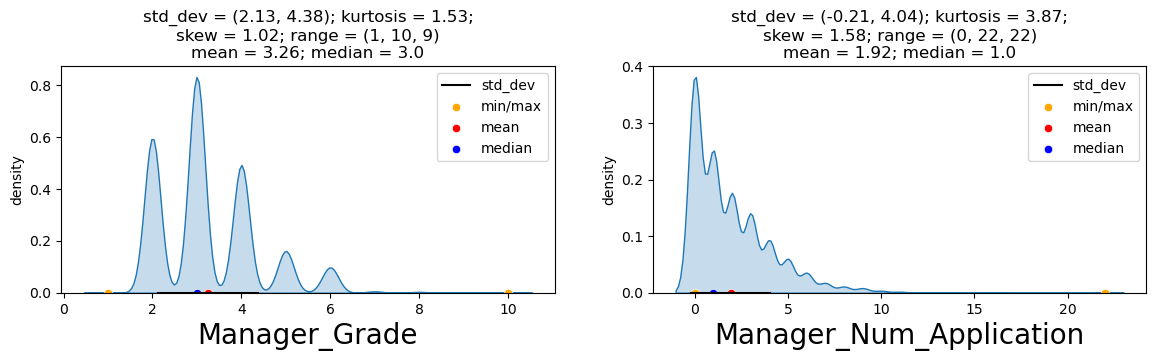

In [35]:
UVA_numeric(data,['Manager_Grade', 'Manager_Num_Application'])

* Most of the values in manager grade ranges between 2 to 4
* Very less number of managers with grades between 7 to 10
* skewness = 1.02 means data is skewed towards right
* kurtosis = 1.53, outliers will be present in the dataset 

#### Manager_Num_Application
* Most of the application ranges between 0 to 5
* skewnwss = 1.58 which means the data is right skewed
* Kurtosis = 3.87 which means high level of outliers are present in our data


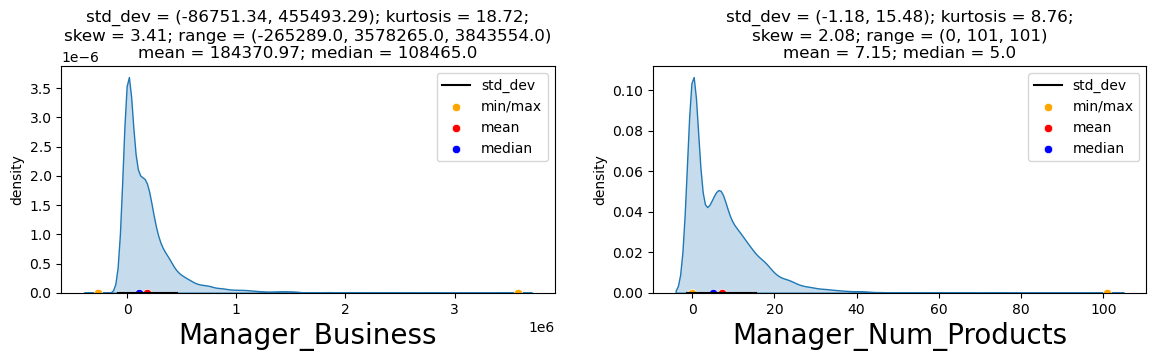

In [36]:
UVA_numeric(data,['Manager_Business', 'Manager_Num_Products'])

#### Manager_Business
* skewness = 3.41, data is highly skewed towards right maybe because some managers do very high business
* Kurtosis = 18.72 which means there are a lot of outliers in our data
* We need to check if the maangers who do higher business are the one's who have more number of products or not?

#### Manager_Num_Products
* maximum products lie between 0 to 20
* data is skewed towards right(skewness = 2.08)
* Kurtosis is also high which means large number of outliers are present

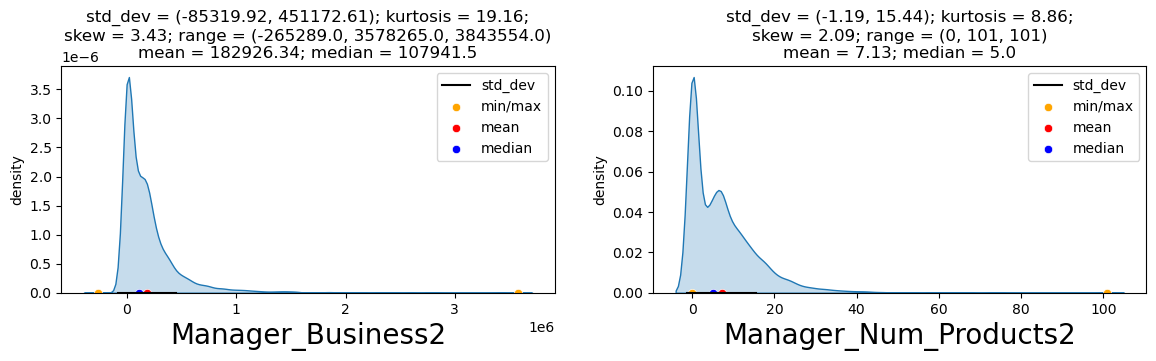

In [37]:
UVA_numeric(data,['Manager_Business2', 'Manager_Num_Products2'])

#### Manager_Business2
* skewness = 3.43, data is highly skewed towards right maybe because some managers do very high business
* Kurtosis = 19.16 which means there are a lot of outliers in our data
* We need to check if the maangers who do higher business are the one's who have more number of products or not?

#### Manager_Num_Products2
* maximum products lie between 0 to 20
* data is skewed towards right(skewness = 2.09)
* Kurtosis is also high which means large number of outliers are present

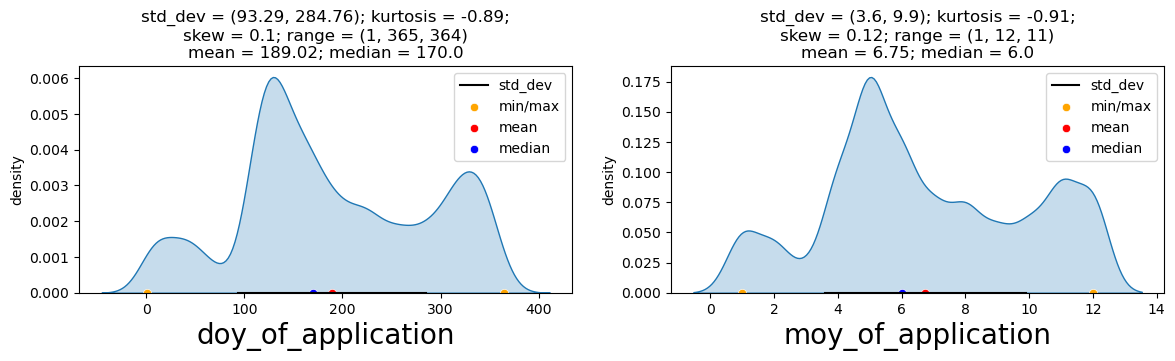

In [38]:
UVA_numeric(data,['doy_of_application', 'moy_of_application'])

* Looking at both the graphs we can see that most of the application comes between april and august
* Mean and median are very close to each other
* skewness is very less on both the graphs
* kurtosis is very less means very less chance of outliers

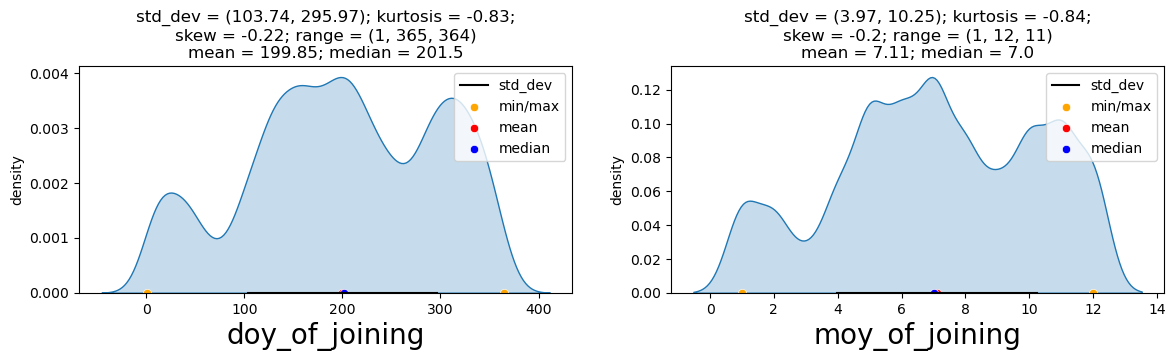

In [39]:
UVA_numeric(data,['doy_of_joining', 'moy_of_joining'])

* Looking at both the graphs we can see that most of the manager joining comes between may,june and july
* Mean and median are very close to each other
* skewness is very less on both the graphs
* kurtosis is very less means very less chance of outliers

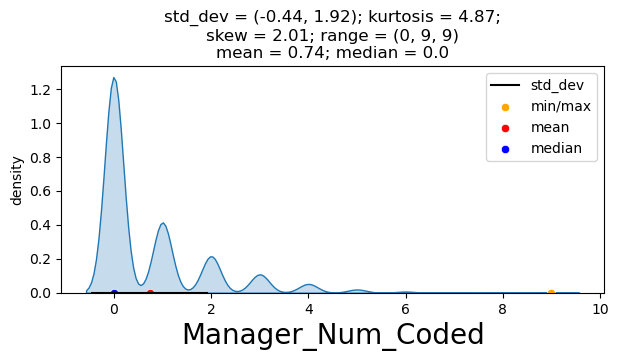

In [40]:
UVA_numeric(data,['Manager_Num_Coded'])

* most of the managers have recruited very less agents
* some have recruited more agents hence it is right skewed and kurtosis = 4.87 means outliers are present

## outliers

In [41]:
def UVA_boxplot(data, var_group, include_outlier = True):
  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  from scipy import stats
  for j,i in enumerate(var_group):
   
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    skew = data[i].skew()
    mini = data[i].min()
    maxi = data[i].max()
    kurt = data[i].kurtosis()
    shapiro_test = stats.shapiro(data[i])
    
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])
    
    plt.subplot(1,size,j+1)
    sns.boxplot(data[i], orient="v")
    plt.ylabel('{}'.format(i))
    plt.title('Skew = {}; Range = {} \n 1st, 2nd, 3rd  quartile = {};\n Whiskers = {}; kurtosis = {} ; \n Number of Outlier (low/high) = {} '.format(
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2)),
                                                                                                   (round(quant25,2),round(med,2),round(quant75,2)),
                                                                                                   (round(whis_low,2), round(whis_high,2)), 
                                                                                                   (round(kurt,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

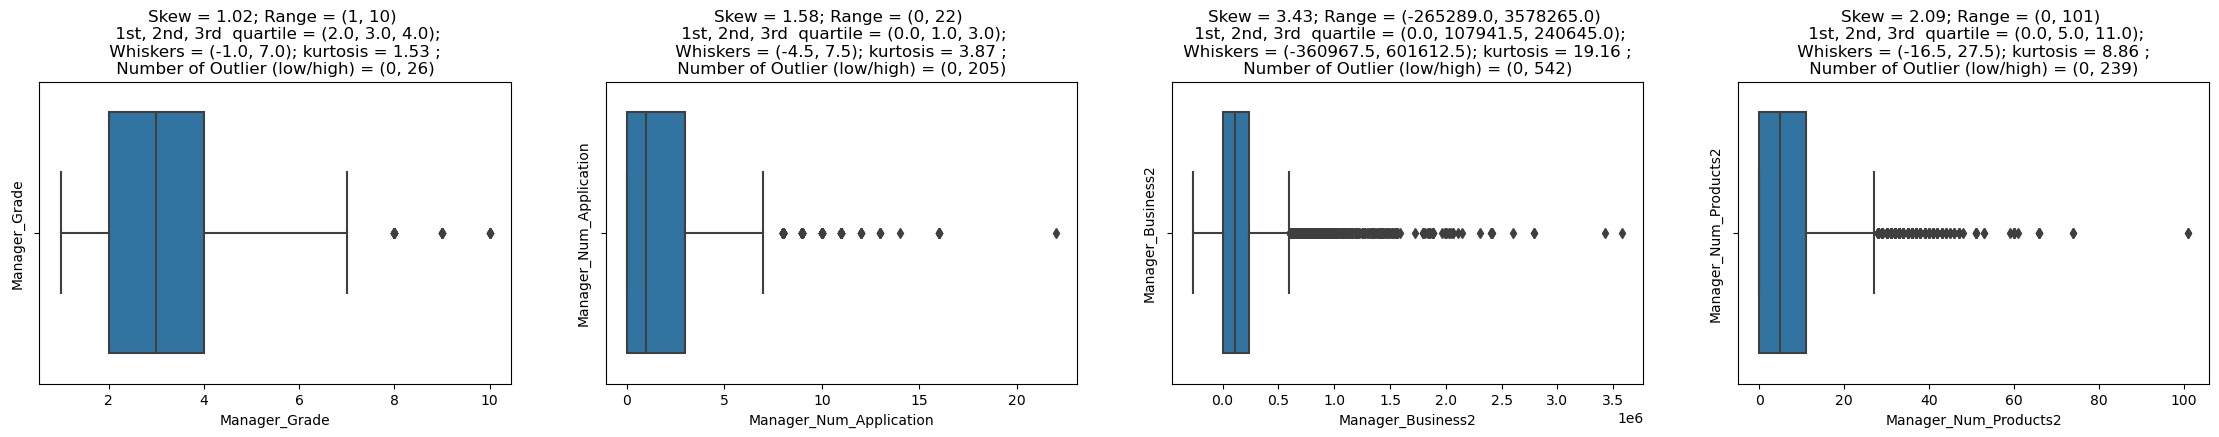

In [42]:
UVA_boxplot(data,['Manager_Grade', 'Manager_Num_Application','Manager_Business2', 'Manager_Num_Products2'])

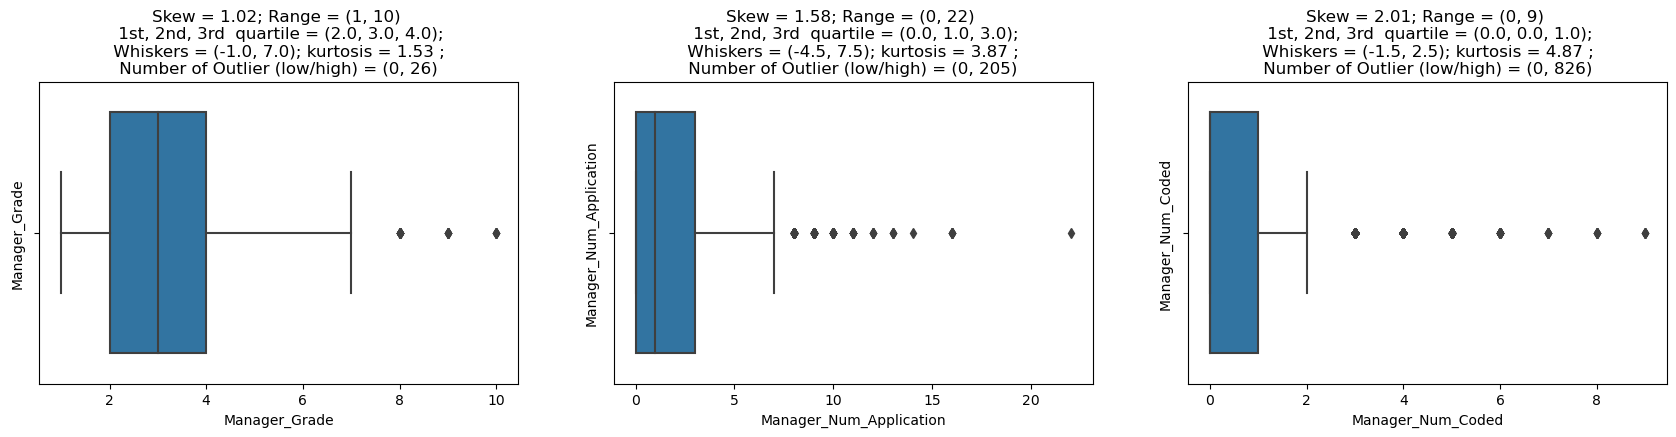

In [43]:
UVA_boxplot(data,['Manager_Grade', 'Manager_Num_Application','Manager_Num_Coded'])

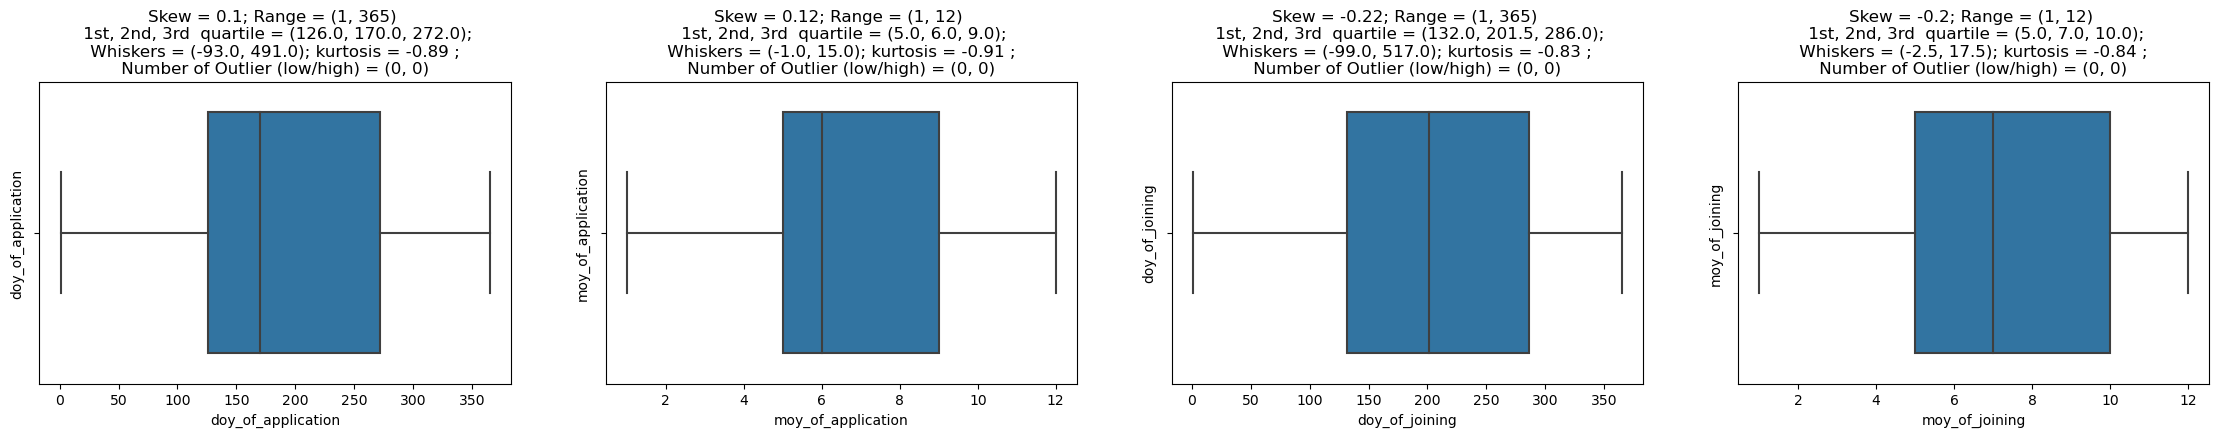

In [44]:
UVA_boxplot(data,['doy_of_application', 'moy_of_application','doy_of_joining', 'moy_of_joining'])

# Univariate Analysis: Categorical variables

In [45]:
data.select_dtypes(exclude=['int64','float64','Int64','datetime64[ns]']).dtypes

ID                             category
Applicant_Gender               category
Applicant_Marital_Status       category
Applicant_Occupation           category
Applicant_Qualification        category
Manager_Joining_Designation    category
Manager_Current_Designation    category
Manager_Status                 category
Manager_Gender                 category
Business_Sourced               category
dtype: object

In [99]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    #plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

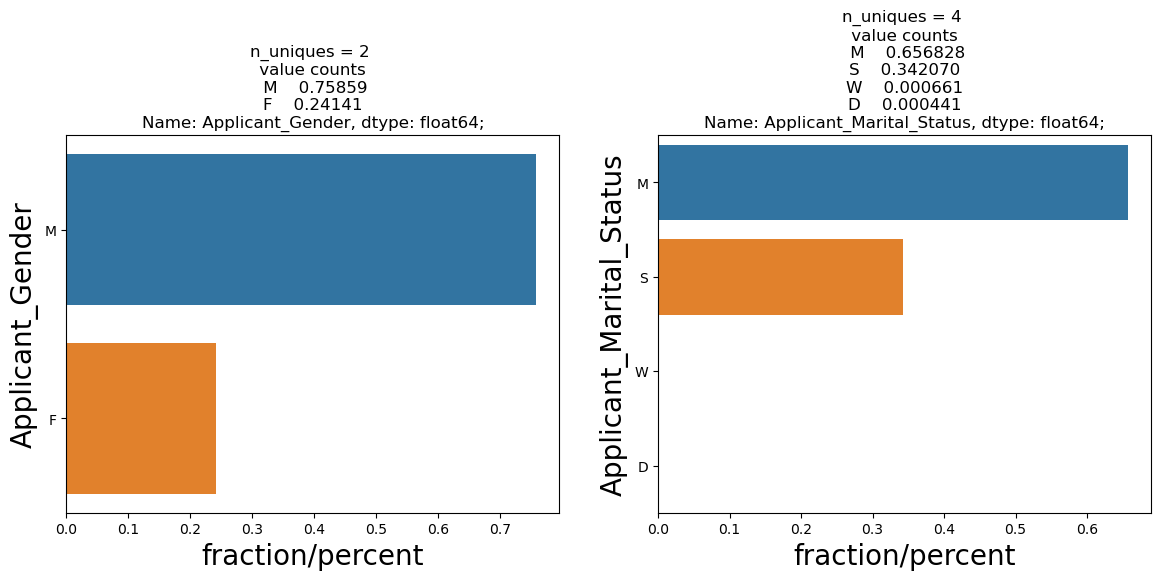

In [47]:
UVA_category(data,['Applicant_Gender','Applicant_Marital_Status'])

#### Applicant_gender
* There are 75% male agents in our data and 25% females
 
#### Applicant_Marital_Status
* There are 65% married agents and 34% single while widowed and divorced are very less almost 0%

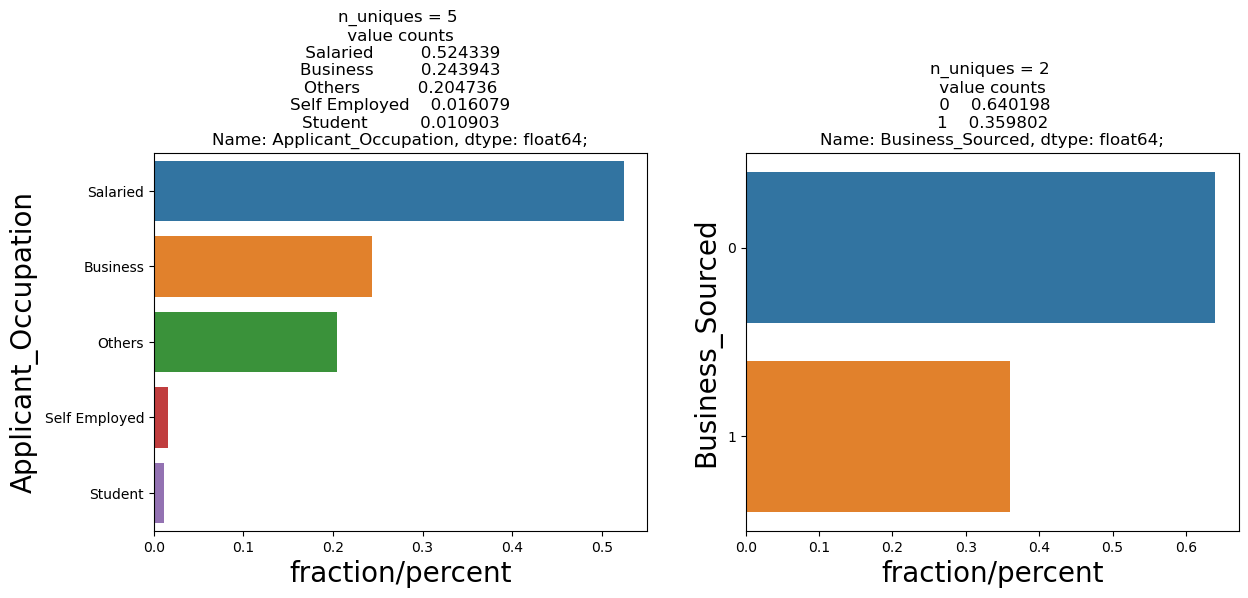

In [75]:
UVA_category(data,['Applicant_Occupation','Business_Sourced'])

#### Applicant_Occupation
* Most of the managers are salaried
* students and self employed agents are very less almost 0%
* business and other type of occupation consititute of 24% and 20%.

#### Business_Sourced
* There are 64% agents who have not done any sale in last 3 months

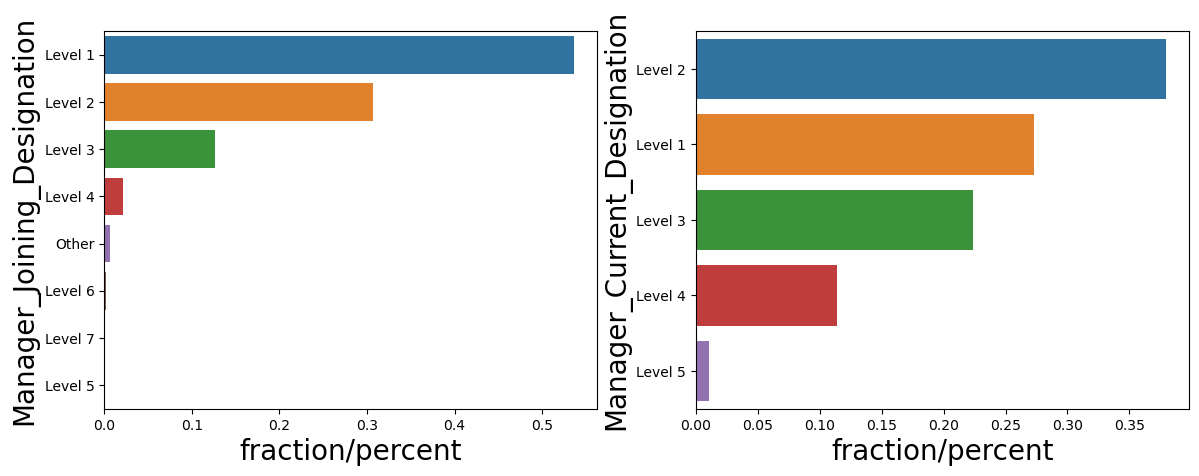

In [100]:
UVA_category(data,['Manager_Joining_Designation','Manager_Current_Designation'])

#### Manager_Joining_Designation & Manager_Current_Designation
* most of the data conisist of  manager joining designation on level 1, level 2 and level 3 rest others are almost 0%
* Manager current designation has level 2 as top designation 
* Since level 1 in joining designation is high they may have been promoted to level 2 hence level 2 is maximum in currrent designation
* Very less managers in level 5 
* Level 4 is the second lowest with 11% of managers

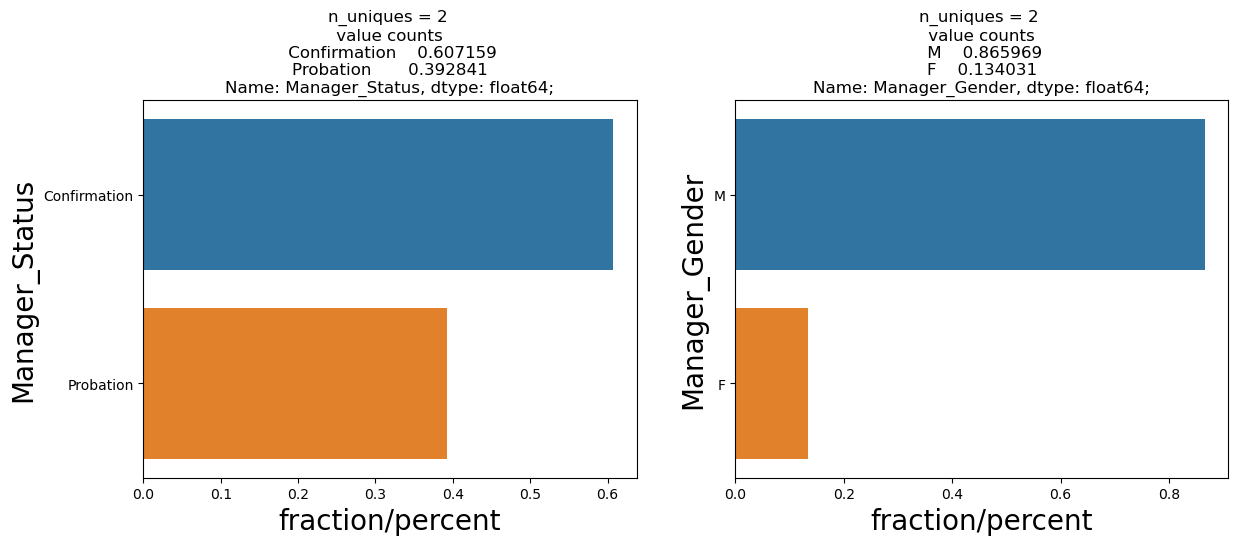

In [50]:
UVA_category(data,['Manager_Status','Manager_Gender'])

#### Manager_Status & Manager_Gender
* 60% managers have their employee status as confirmation
* 86% male managers in our data with just 14% female

# Bivariate Analysis:   Numerical-Numerical

In [52]:
# isolating numerical datatypes
numerical = data.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

Office_PIN                   int64
Applicant_City_PIN           int64
Manager_Grade                int64
Manager_Num_Application      int64
Manager_Num_Coded            int64
Manager_Business           float64
Manager_Num_Products         int64
Manager_Business2          float64
Manager_Num_Products2        int64
doy_of_application           int64
moy_of_application           int64
doy_of_joining               int64
moy_of_joining               int64
dtype: object

In [53]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,doy_of_application,moy_of_application,doy_of_joining,moy_of_joining
Office_PIN,1.000000,0.949152,-0.075854,0.060670,0.064796,0.092232,0.130252,0.092019,0.129819,0.004595,0.000900,0.041462,0.039112
Applicant_City_PIN,0.949152,1.000000,-0.084614,0.058713,0.063235,0.087659,0.124252,0.087030,0.123826,-0.014880,-0.018571,0.034165,0.031749
Manager_Grade,-0.075854,-0.084614,1.000000,-0.019823,0.001015,0.321985,0.210314,0.320419,0.209833,0.028360,0.029937,0.004162,0.009023
Manager_Num_Application,0.060670,0.058713,-0.019823,1.000000,0.517527,0.014569,-0.030014,0.015831,-0.029726,0.106420,0.115891,0.028119,0.029747
Manager_Num_Coded,0.064796,0.063235,0.001015,0.517527,1.000000,0.152055,0.129107,0.154473,0.129612,0.000439,0.004619,0.024022,0.025927
Manager_Business,0.092232,0.087659,0.321985,0.014569,0.152055,1.000000,0.733877,0.994422,0.729145,-0.121696,-0.123891,0.002936,-0.000416
Manager_Num_Products,0.130252,0.124252,0.210314,-0.030014,0.129107,0.733877,1.000000,0.736269,0.998893,-0.155578,-0.155808,0.006168,-0.001817
Manager_Business2,0.092019,0.087030,0.320419,0.015831,0.154473,0.994422,0.736269,1.000000,0.735592,-0.120176,-0.122533,0.001926,-0.001237
Manager_Num_Products2,0.129819,0.123826,0.209833,-0.029726,0.129612,0.729145,0.998893,0.735592,1.000000,-0.154800,-0.155102,0.004758,-0.003144
doy_of_application,0.004595,-0.014880,0.028360,0.106420,0.000439,-0.121696,-0.155578,-0.120176,-0.154800,1.000000,0.996422,0.132604,0.132647


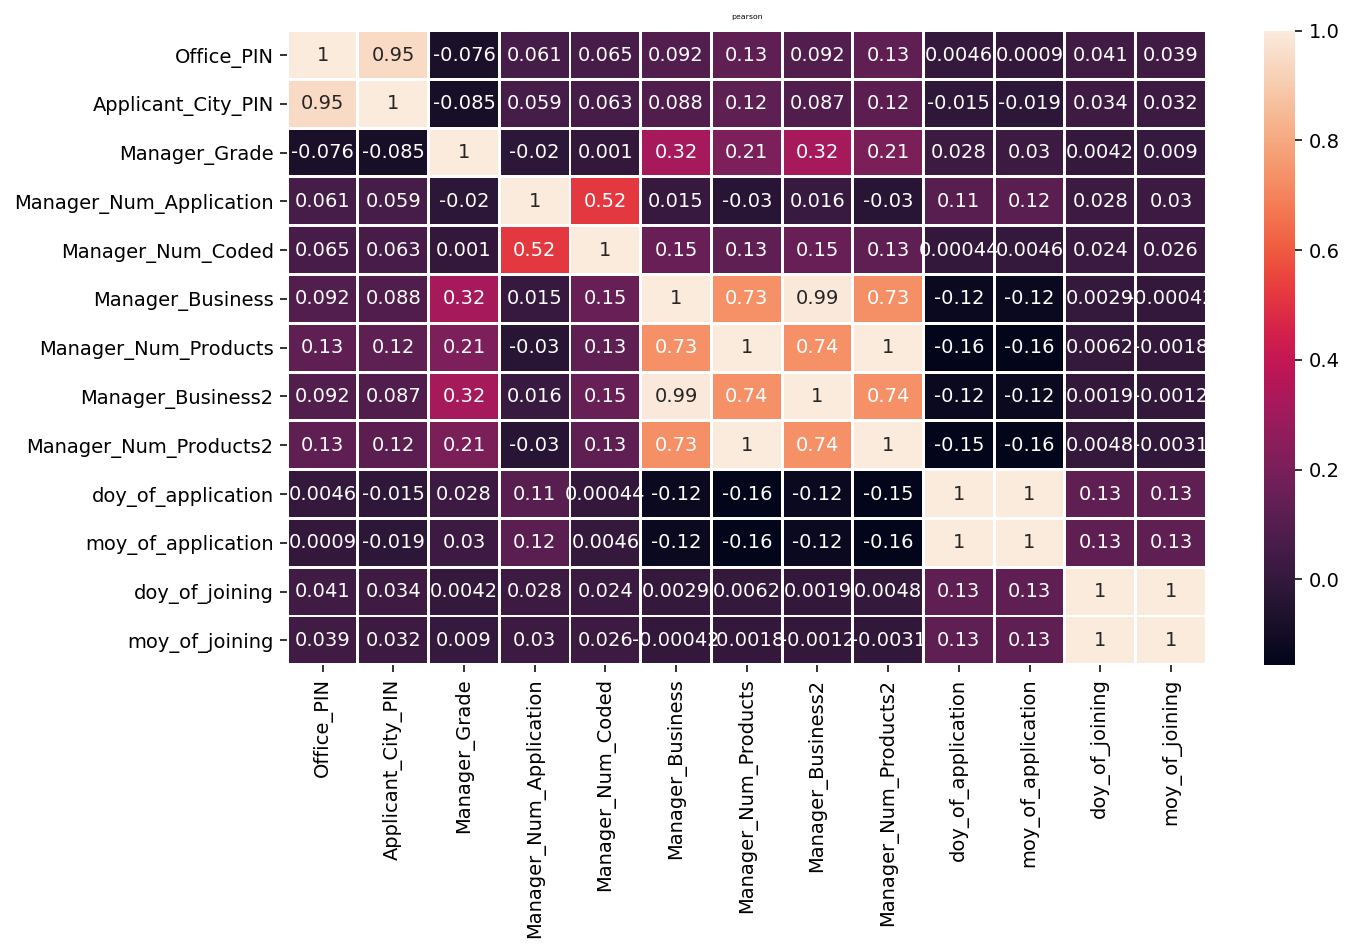

In [110]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 1, annot = True)
  plt.title(i, fontsize=4)

* In pearson there is high correlation between manager_business and manager_business_2
* Manager_business and manager_num_products have 73% correlation
* Manager_business2 and manager_num_products2 have 74% correlation
* Office pin and applicant_city_pin are also correlated with each other
* Also there is some correlation between manager_num_application and manager_num_coded
* The day and month varaibles we have created have 100% correlation between each other

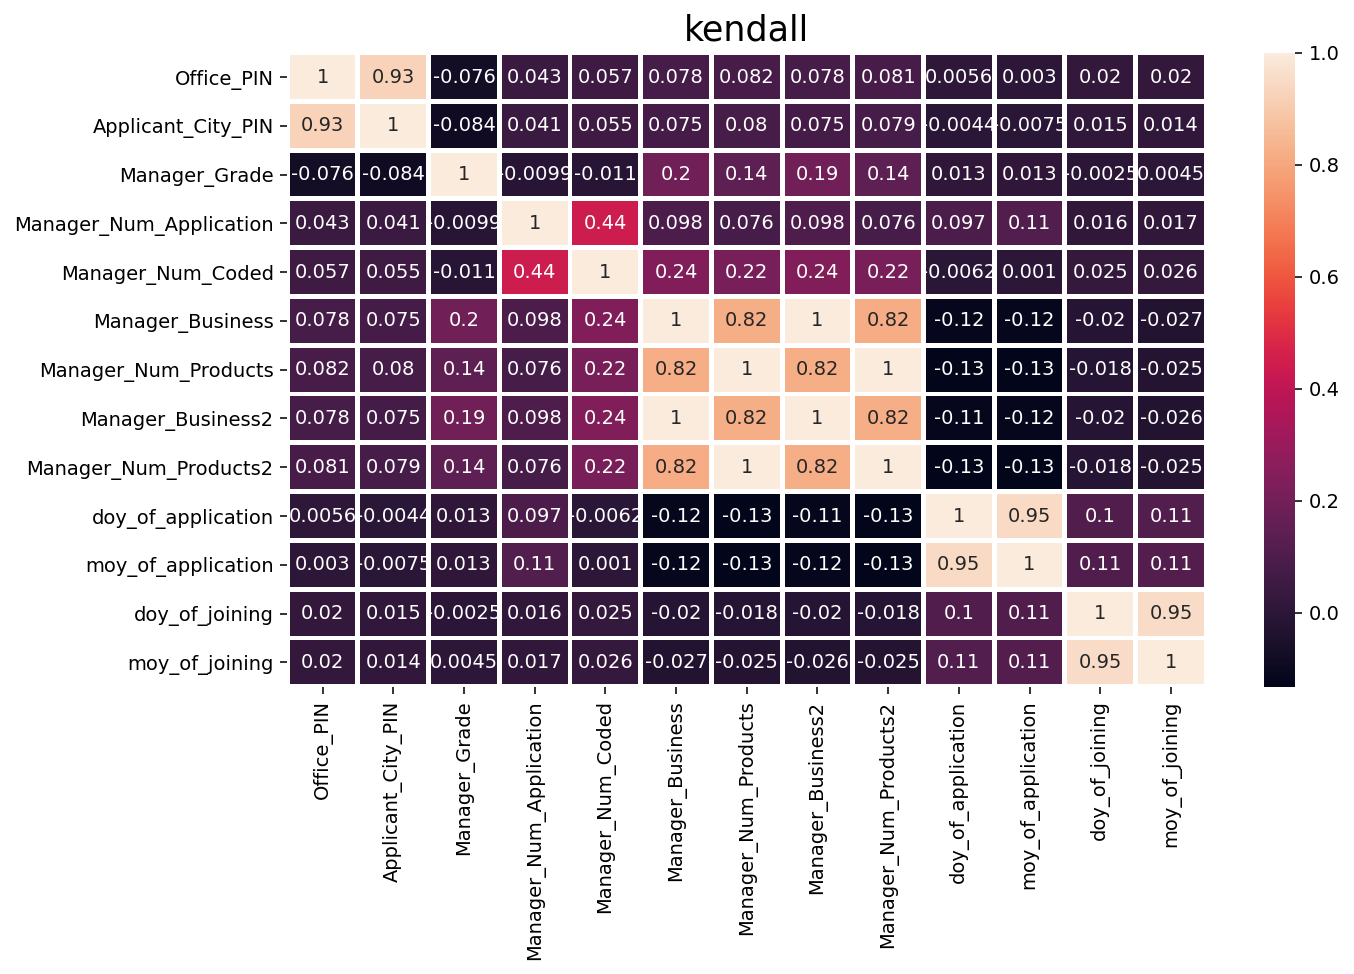

In [55]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['kendall']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot = True)
  plt.title(i, fontsize=18)

* In pearson there is high correlation between manager_business and manager_business_2
* Manager_business and manager_num_products have 82% correlation
* Manager_business2 and manager_num_products2 have 82% correlation
* Office pin and applicant_city_pin are also correlated with each other
* Also there is some correlation between manager_num_application and manager_num_coded


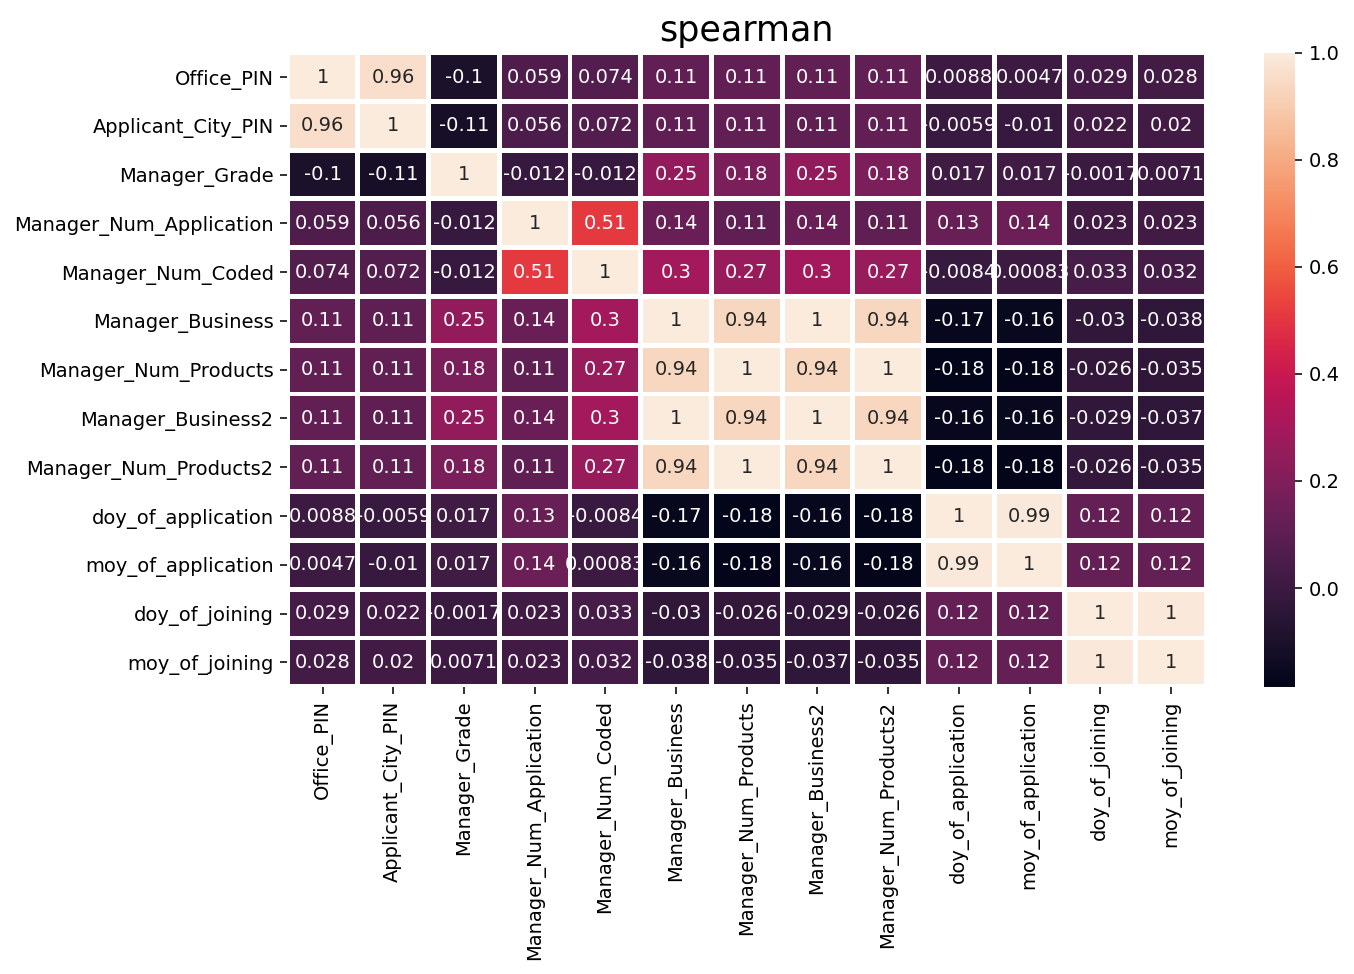

In [56]:
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2, annot = True)
  plt.title(i, fontsize=18)

* In pearson there is high correlation between manager_business and manager_business_2
* Manager_business and manager_num_products have 94% correlation
* Manager_business2 and manager_num_products2 have 94% correlation
* Office pin and applicant_city_pin are also correlated with each other
* Also there is some correlation between manager_num_application and manager_num_coded
* The day and month varaibles we have created have 100% correlation between each other

#### scatter plot of correlating variables

<AxesSubplot:xlabel='Manager_Business', ylabel='Manager_Num_Products'>

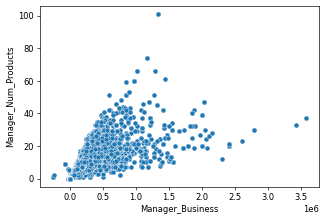

In [76]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Manager_Business'], numerical['Manager_Num_Products'])

<AxesSubplot:xlabel='Manager_Business2', ylabel='Manager_Num_Products2'>

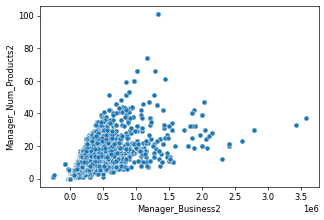

In [77]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Manager_Business2'], numerical['Manager_Num_Products2'])

<AxesSubplot:xlabel='Manager_Business', ylabel='Manager_Business2'>

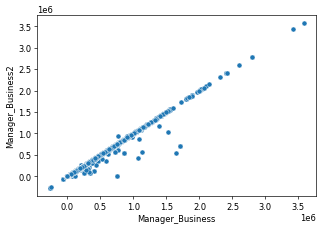

In [78]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Manager_Business'], numerical['Manager_Business2'])

<AxesSubplot:xlabel='Manager_Num_Application', ylabel='Manager_Num_Coded'>

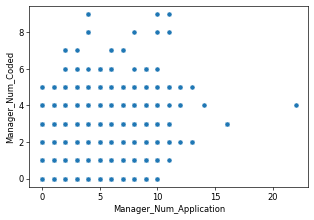

In [79]:
plt.figure(dpi=60)
sns.scatterplot(numerical['Manager_Num_Application'], numerical['Manager_Num_Coded'])

# Bivariate: Categorical-Categorical

### List of hypothesis to check

* Are male agents more likely to source business/generate sale
* Are male managers more likely to appoint sourcing agents
* Are married agents more likely to source business
* Is applicant occupation an important factor in sourcing business
* Applicant qualification an important factor in sourcing business
* Manager_joining_designation a reason of agents sourcing
* Manager_joining_designation a reason of agents sourcing
* Is manager_grade an important factor in sourcing business
* Is manager status an important factor in sourcing business
* Is manager_num_application a reason for agent sourcing

In [58]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

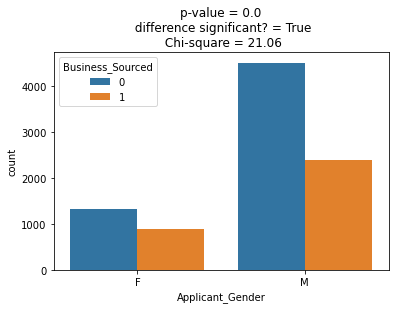

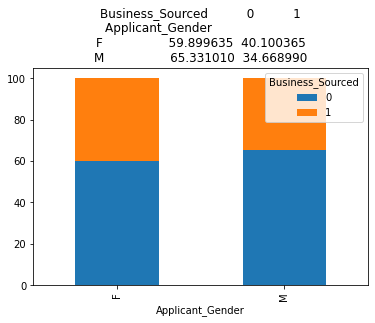

In [60]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Gender')

* By the p_value and chi_squared test we can see that the difference between the male and female agents sourcing business
* By the frequency we can say that sourcing rate of female are more than male agents

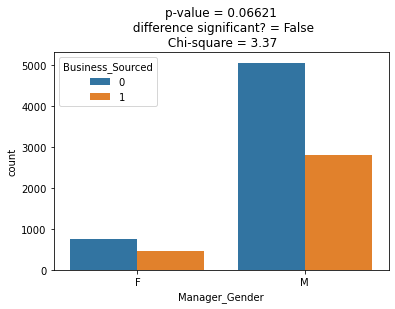

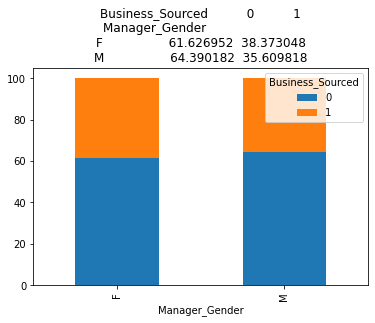

In [61]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Gender')

* By the p_value and chi_squared test we can see that the difference between the male and female managers is not significant in agents sourcing the business
* By the frequency we can see the female managers have higher sourcing rate than male maangers

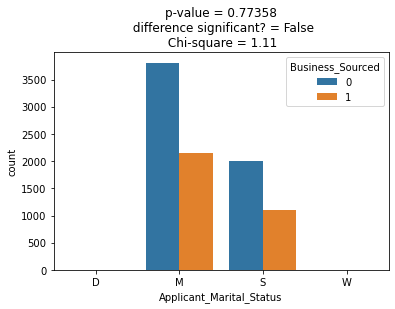

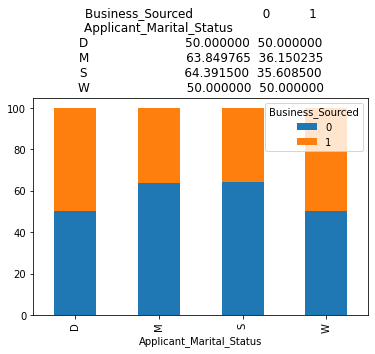

In [62]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Marital_Status')

* By the p_value and chi_squared test we can see that the difference between the applicant marital status in sourcing business is not significant
* By the frequency we can see the divoreced and widowed have 50% sourcing rate but they are very less in numbers

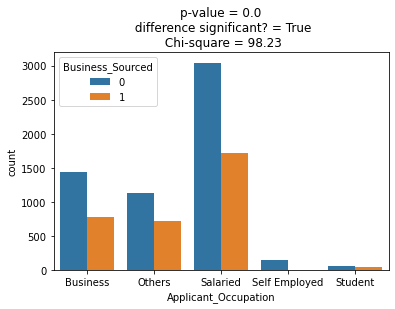

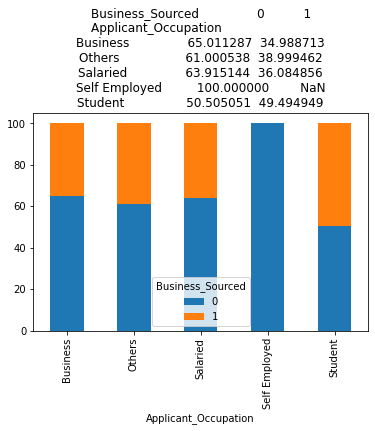

In [63]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Occupation')

* By the p_value and chi_squared test we can see that the difference between the applicant occupation in sourcing business is significant
* By the frequency we can see the self employed applicants have 0 or null sourcing rate
* students have around 49% sourcing rate

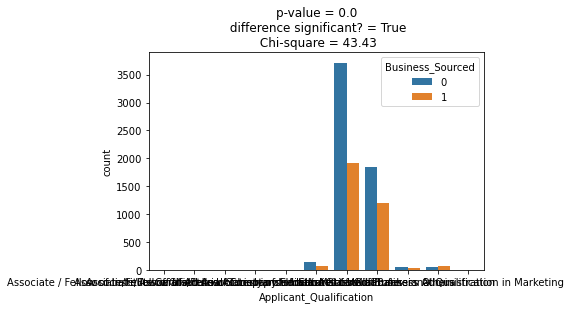

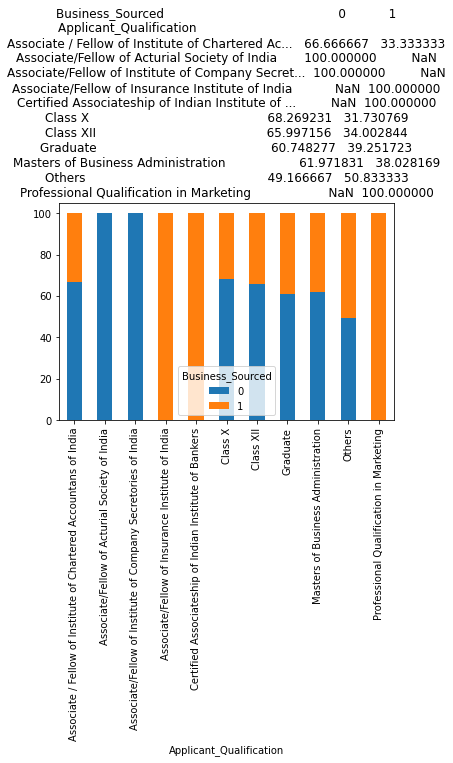

In [64]:
BVA_categorical_plot(data, 'Business_Sourced', 'Applicant_Qualification')

* By the p_value and chi_squared test we can see that the difference between the applicants qualification in sourcing the business is significant
* By the frequency we can see there are 0% sourcing rate in some qualification and 100% in some
* others stands with 50% sourcing

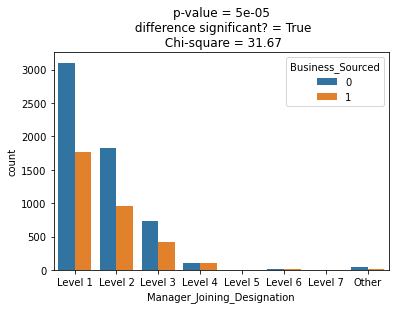

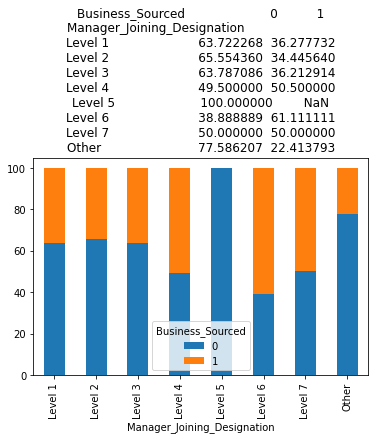

In [65]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Joining_Designation')

* By the p_value and chi_squared test we can see that the difference between the managers joining designation in agent's business sourcing is significant
* By the frequency we can see agents under managers having level5 designation have 0% sourcing rate
* Level 6 have the most 61% cnoversion rate 

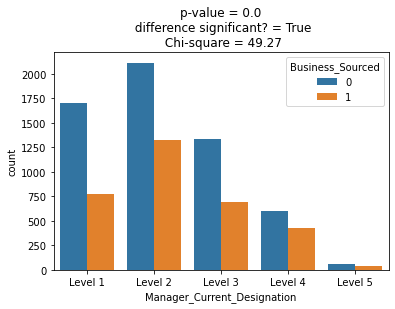

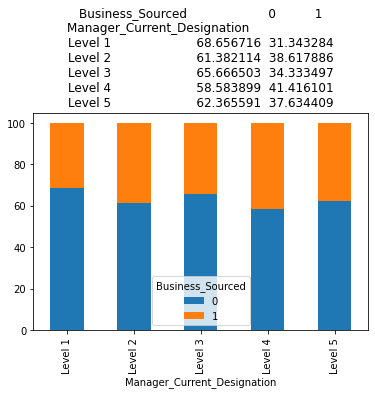

In [66]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Current_Designation')

* By the p_value and chi_squared test we can see that the difference between the managers current designation in agent's business sourcing is significant
* Level 4 have the most 41% cnoversion rate 

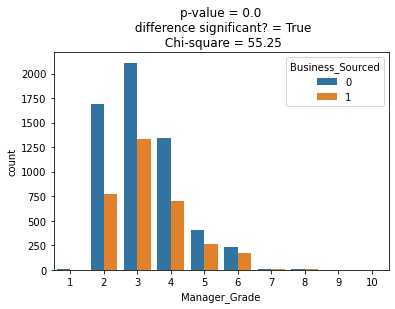

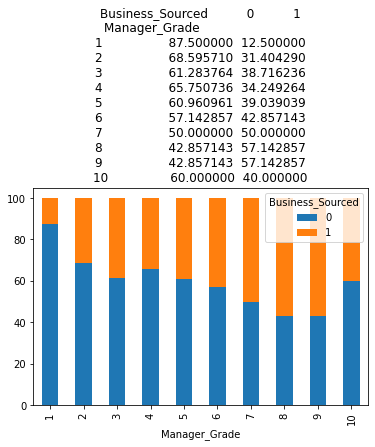

In [67]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Grade')

* By the p_value and chi_squared test we can see that the difference between the managers grade in agent's business sourcing is significant
* grade 8 and 9  have the most 57% cnoversion rate 

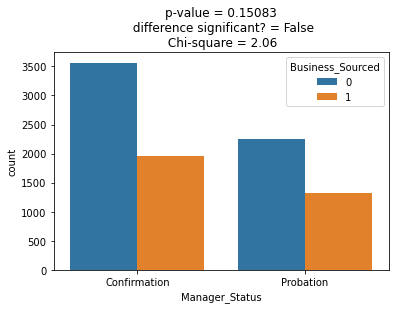

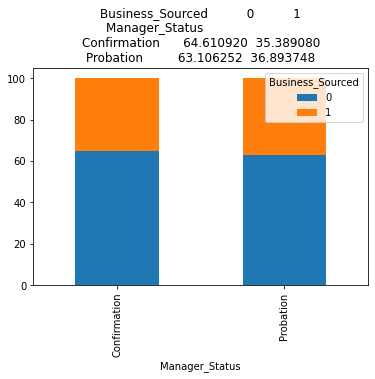

In [68]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Status')

* By the p_value and chi_squared test we can see that the difference between the managers status in agent's business sourcing is not significant


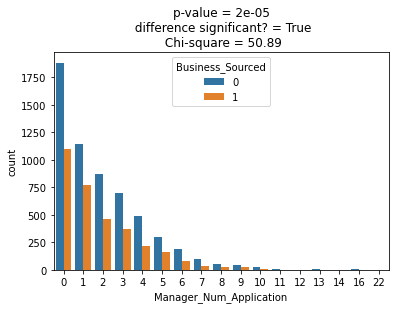

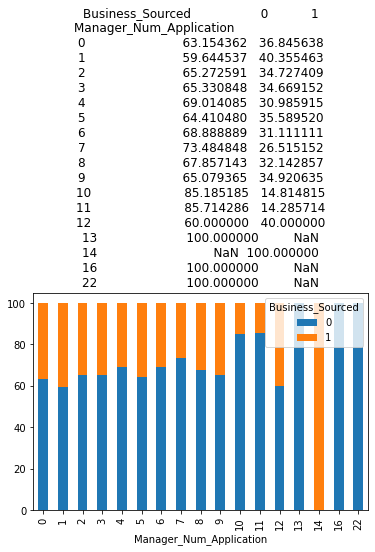

In [69]:
BVA_categorical_plot(data, 'Business_Sourced', 'Manager_Num_Application')

* By the p_value and chi_squared test we can see that the difference between the managers number of application in agent's business sourcing is significant


# Bivariate: Continuous-Categorical

### list of hypothesis to check

* Are the average grade of maangers equal to that of business souced agents
* Are the average manager_num_application equal to that of business sourcing agents
* Are the average manager num coded equal to that of business sourcing agents
* Are the average manager business equal to that of business sourcing agents
* Are the average manager num products equal to that of business sourcing agents
* Are the average manager business2 equal to that of business sourcing agents
* Are the average manager num products2 equal to that of business sourcing agents


In [70]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval
'''''
Testing if they are equal or not. If p_value < 0.05 we reject the null hypothesis
'''''

def Bivariate_cont_cat(data, cont, cat, category):
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  t_p_val = round(TwoSampT(m1, m2, std1, std2, n1, n2),4)
  z_p_val = round(TwoSampZ(m1, m2, std1, std2, n1, n2),4)
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  table = round(table,2)
  plt.figure(figsize = (15,6), dpi=140)
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val, z_p_val, table))
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

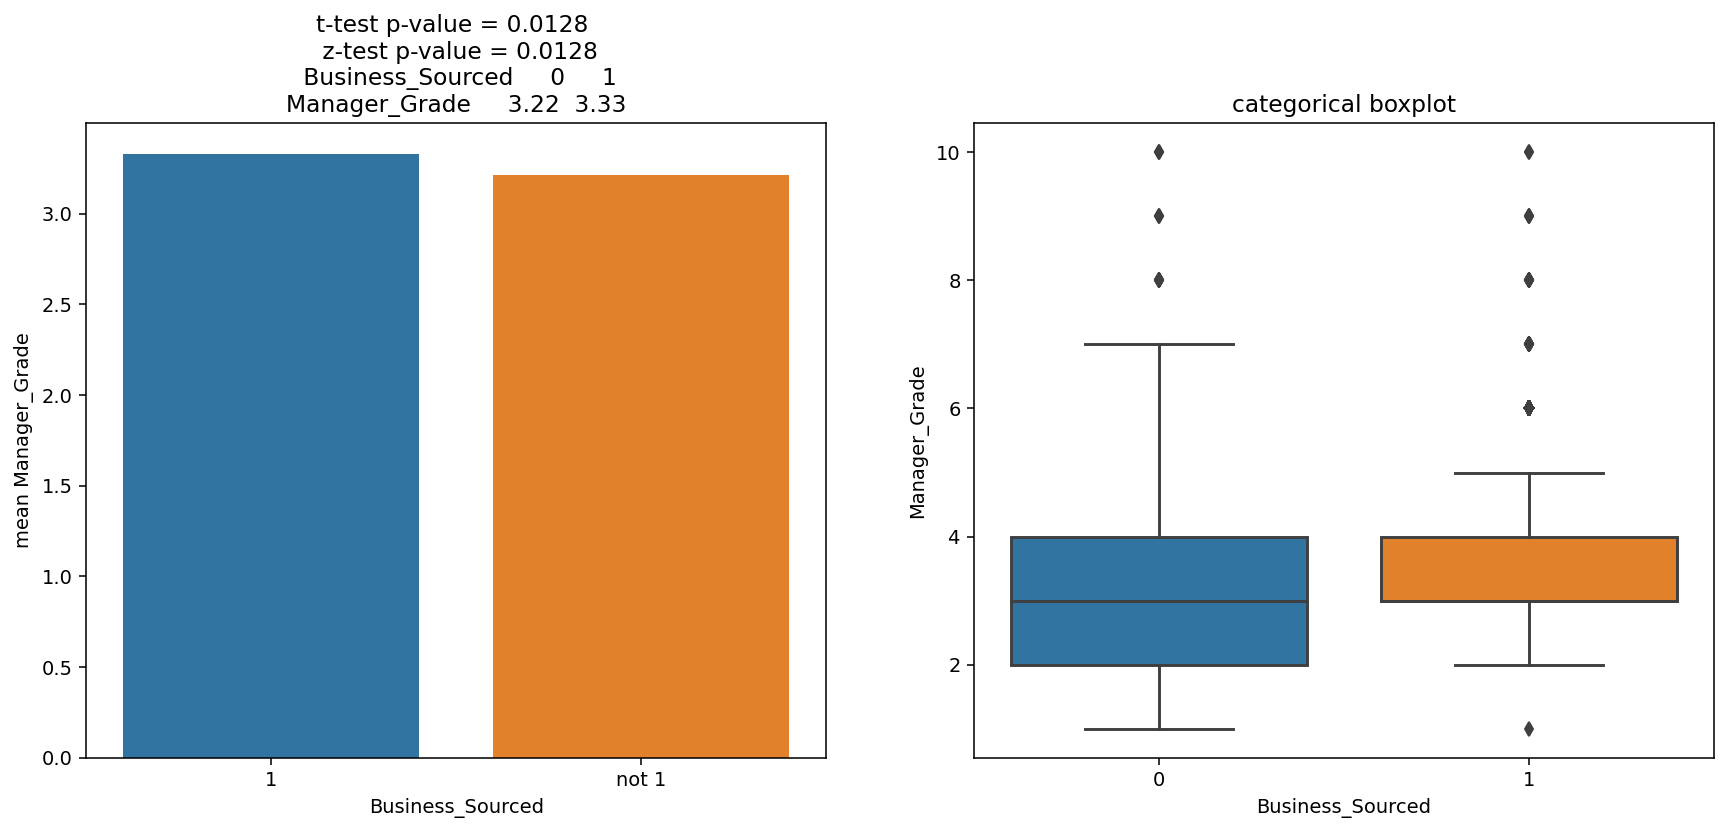

In [81]:
Bivariate_cont_cat(data, 'Manager_Grade', 'Business_Sourced', 1)

* There is significant difference between  manager grade and business sourcing agents

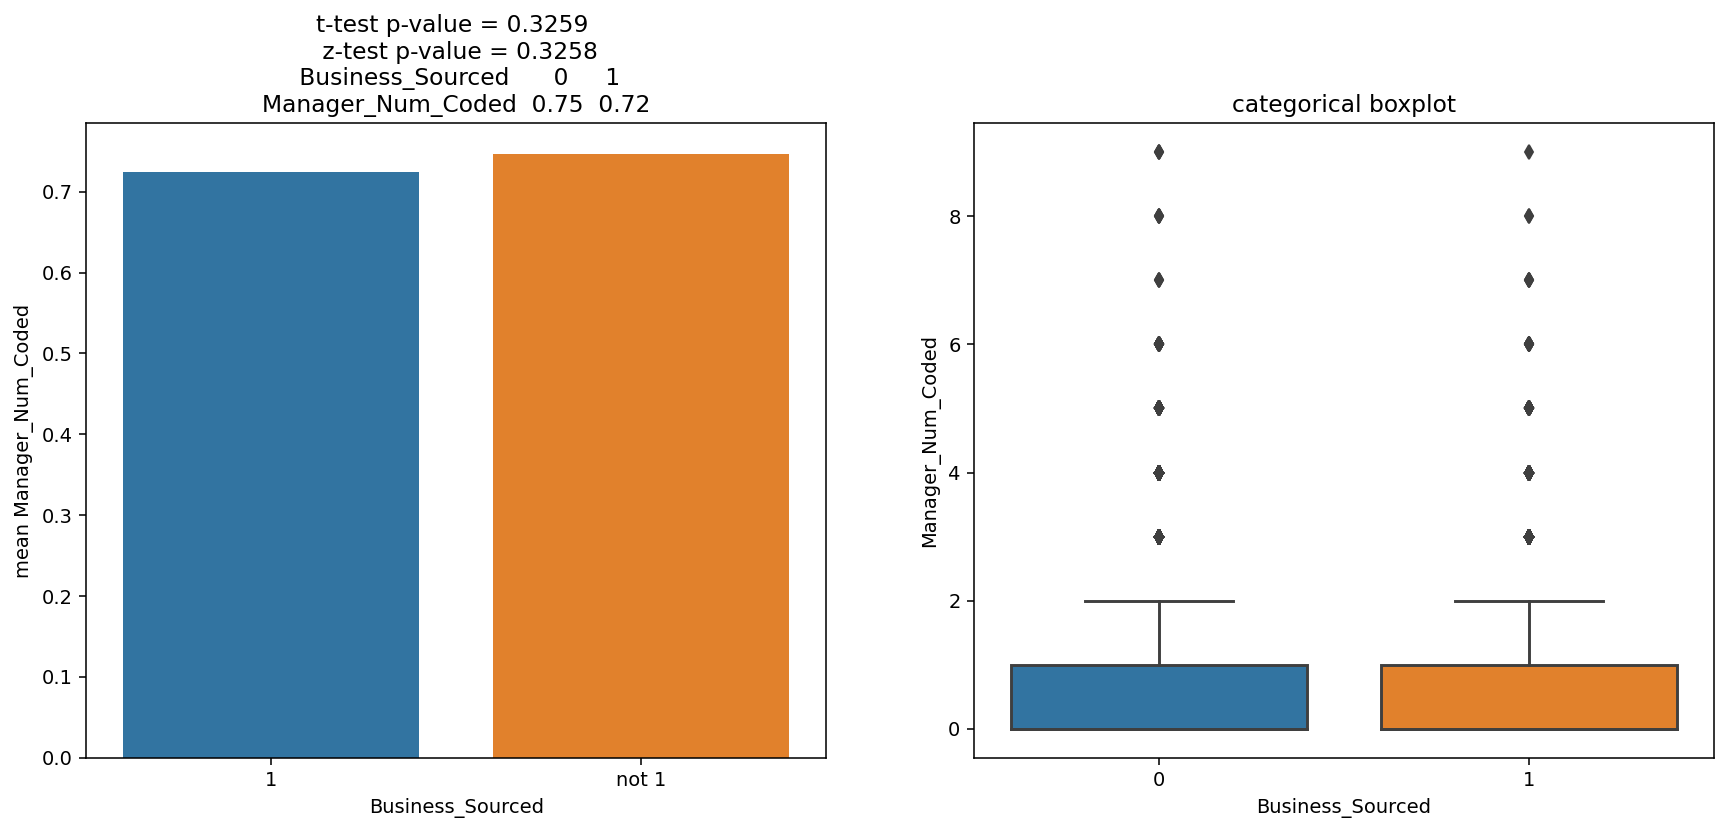

In [71]:
Bivariate_cont_cat(data, 'Manager_Num_Coded', 'Business_Sourced', 1)

* There is  no significant difference between maanger_Num_Coded and business sourced

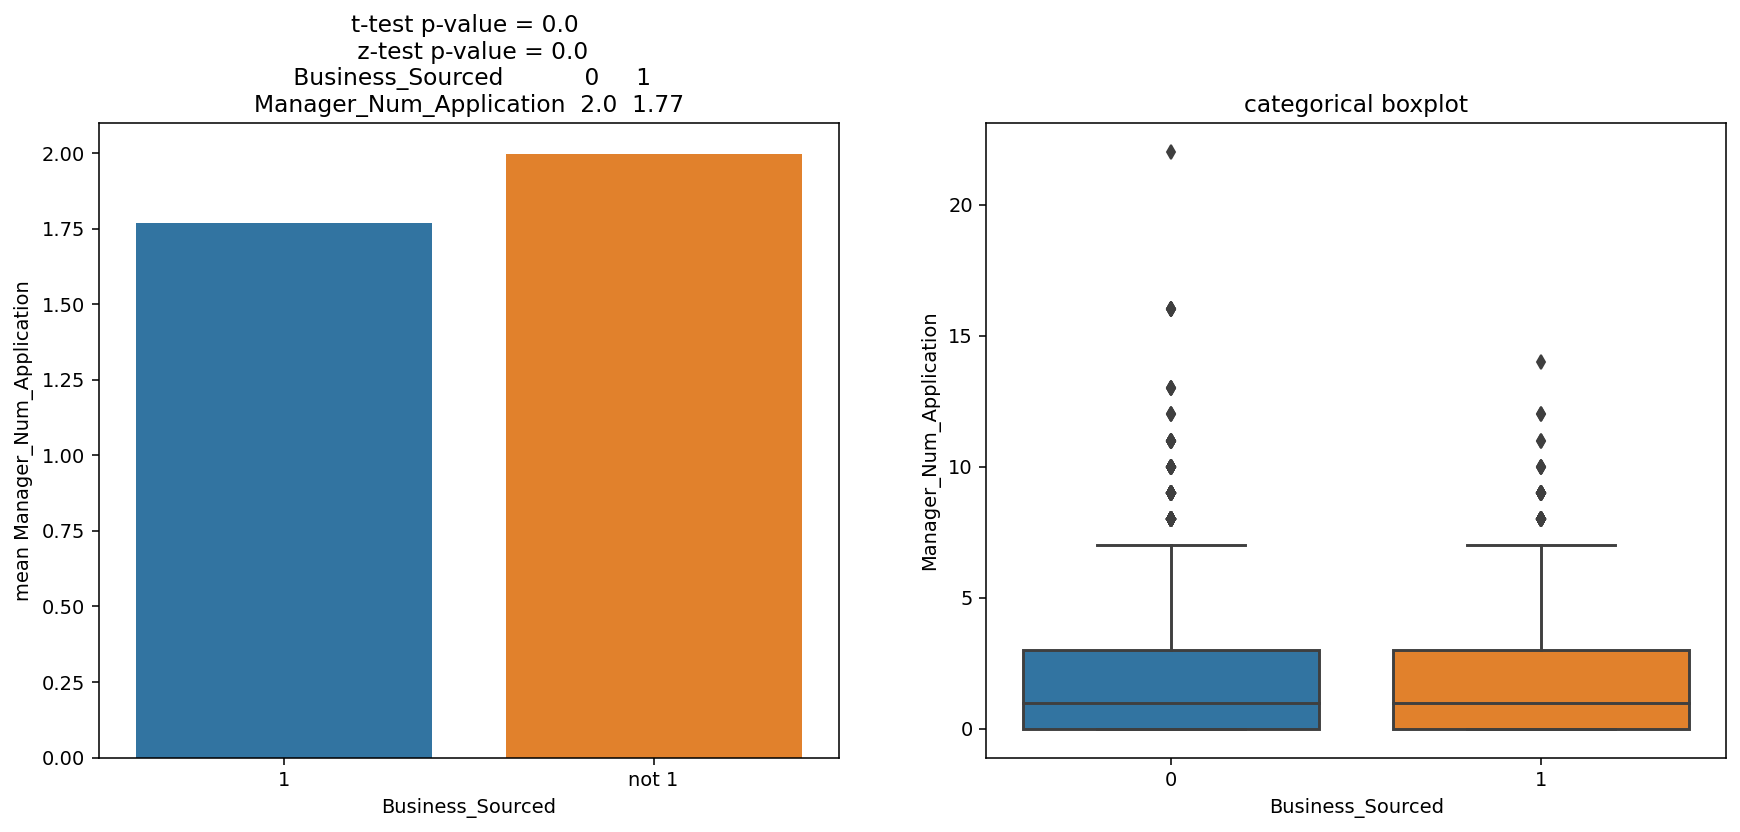

In [82]:
Bivariate_cont_cat(data, 'Manager_Num_Application', 'Business_Sourced', 1)

* There is significant difference between manager num applications and business sourcing agents

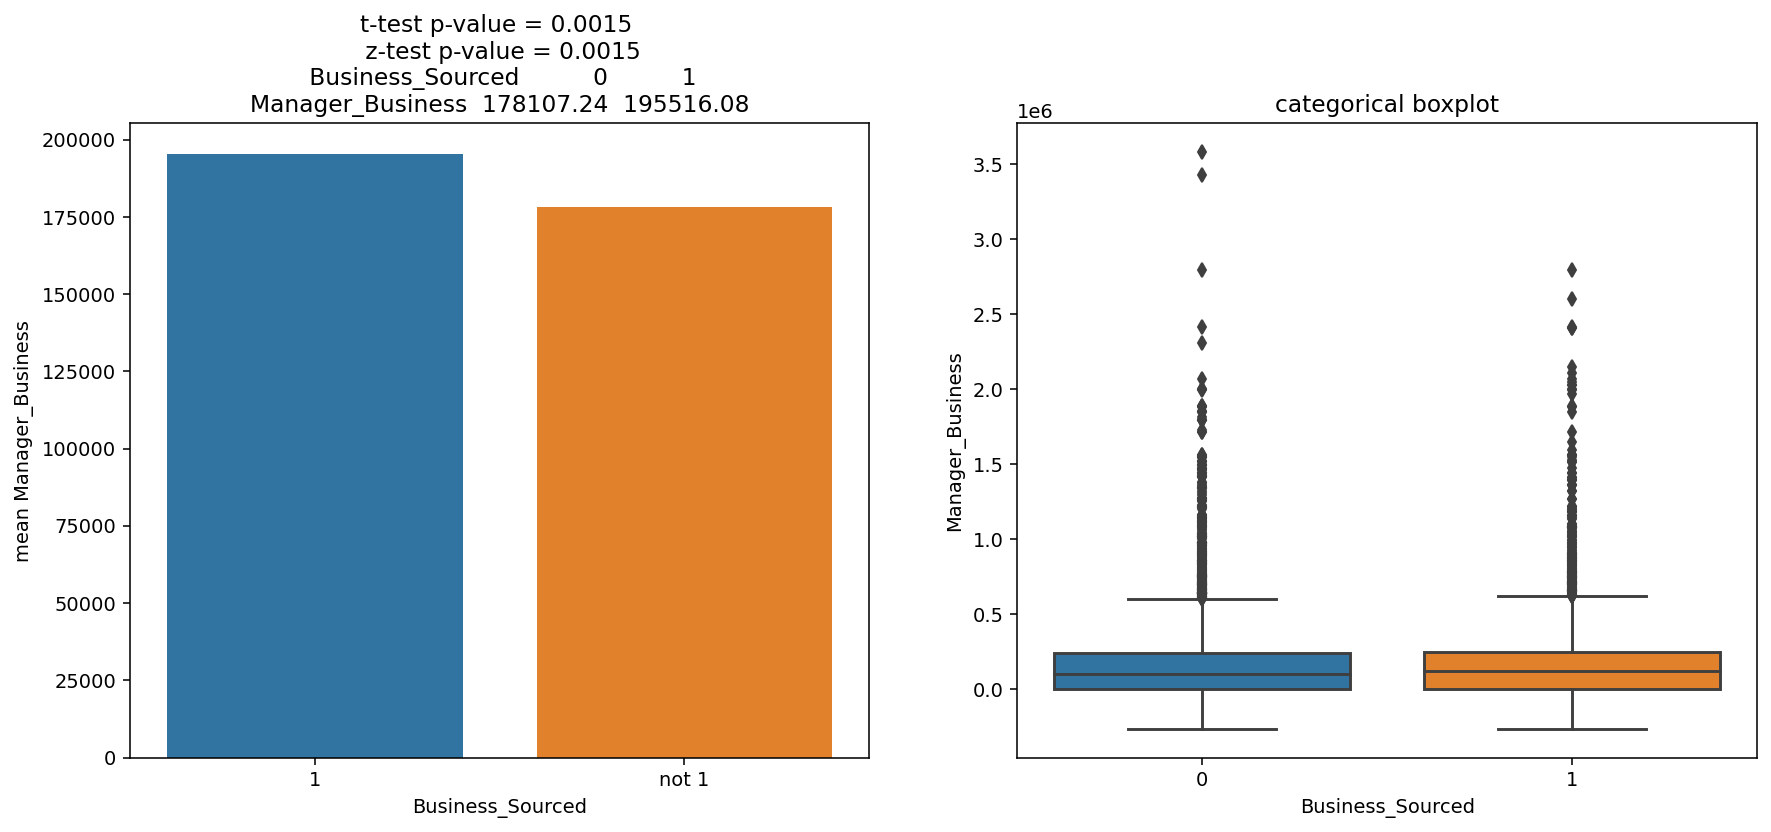

In [72]:
Bivariate_cont_cat(data, 'Manager_Business', 'Business_Sourced', 1)

* There is significant difference between manager business and business sourcing agents

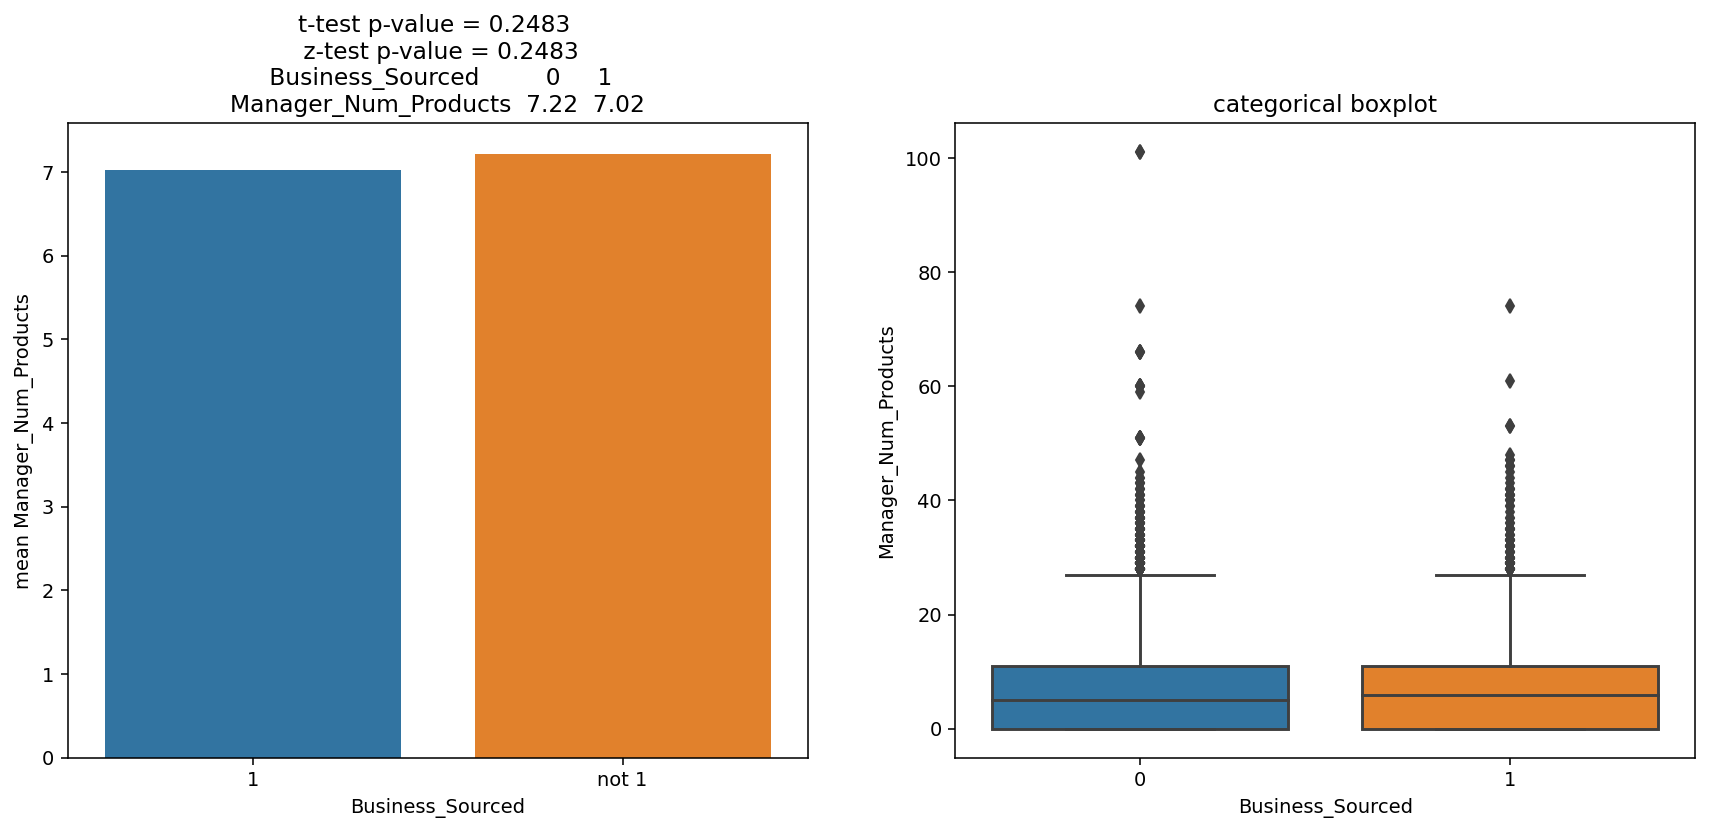

In [73]:
Bivariate_cont_cat(data, 'Manager_Num_Products', 'Business_Sourced', 1)

* There is  no significant difference between manager grade and business sourcing agents

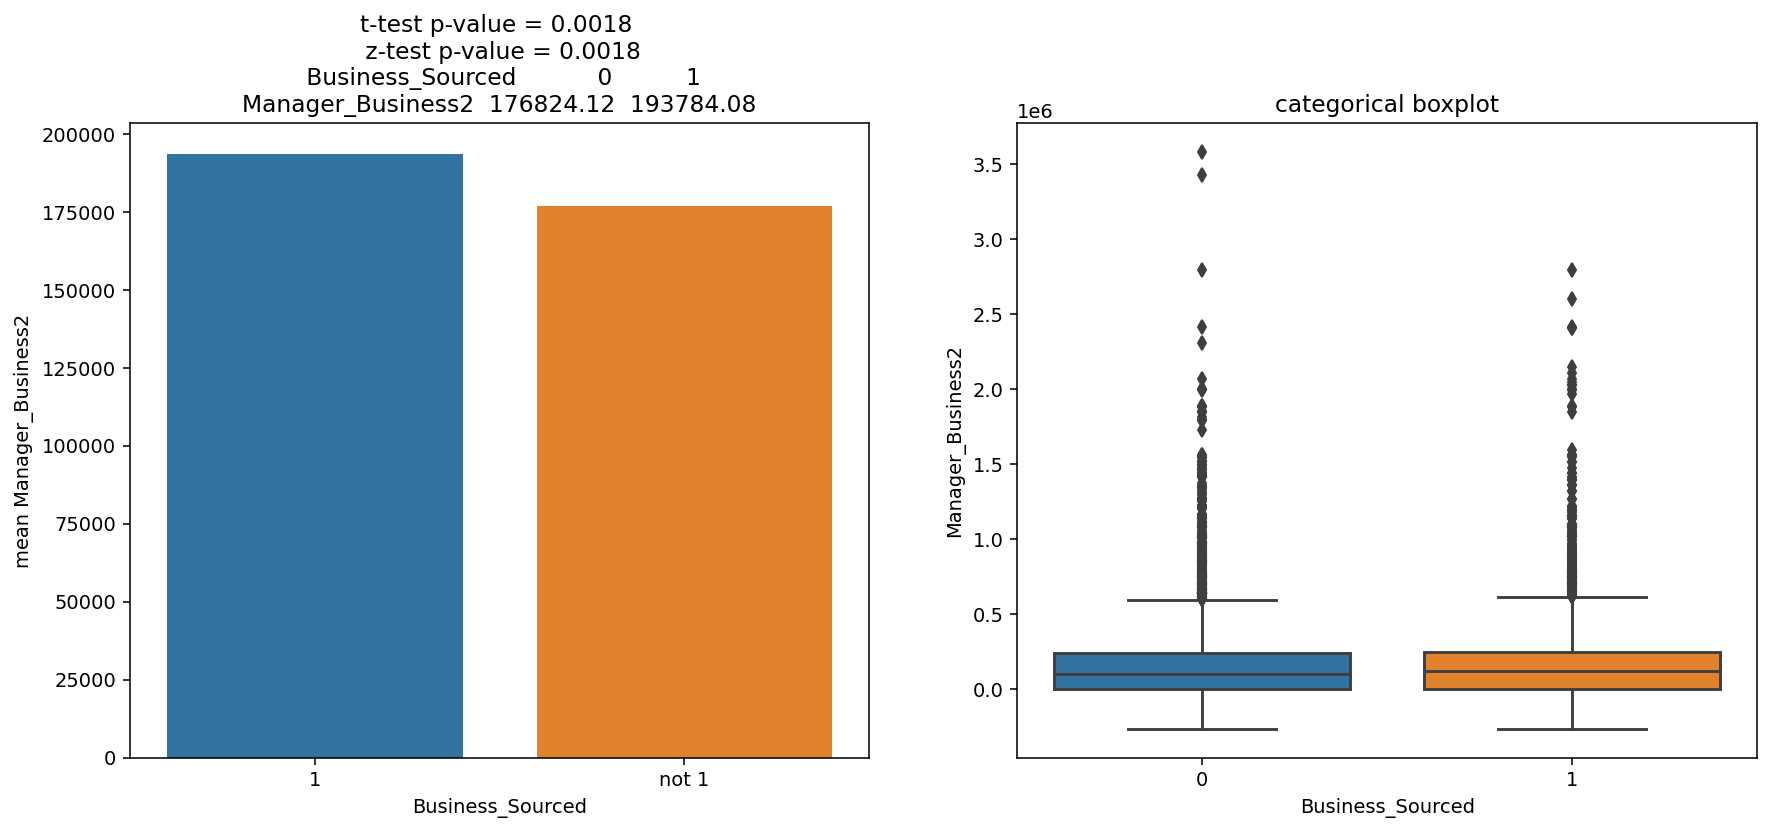

In [84]:
Bivariate_cont_cat(data, 'Manager_Business2', 'Business_Sourced', 1)

* There is no significant difference between manager grade and business sourcing agents

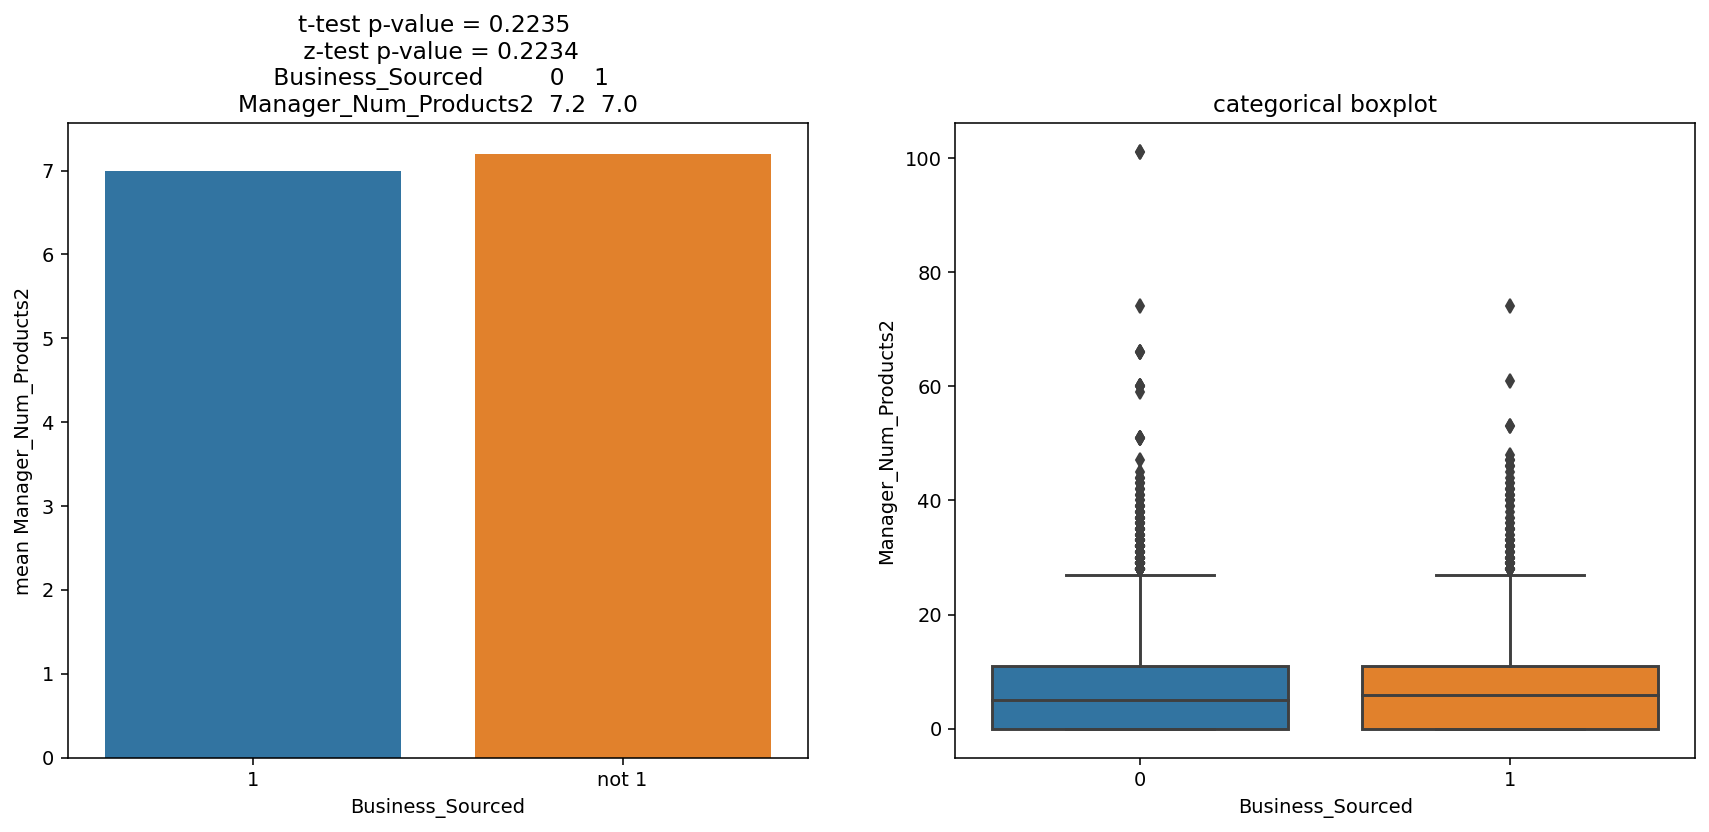

In [85]:
Bivariate_cont_cat(data, 'Manager_Num_Products2', 'Business_Sourced', 1)

* There is no significant difference between manager grade and business sourcing agents

In [86]:
Target_variable=data["Business_Sourced"].isin([1])
new_data=data[Target_variable]
new_data.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,doy_of_application,moy_of_application,doy_of_joining,moy_of_joining
1,FIN1000002,842001,2007-04-16,844111,M,1983-02-17,S,Others,Class XII,2005-11-10,...,1,335249.0,28,335249.0,28,1,106,4,314,11
5,FIN1000006,814112,2007-04-16,814114,M,1988-03-23,S,Others,Class XII,2006-01-17,...,0,247118.0,24,247118.0,24,1,106,4,17,1
6,FIN1000007,842001,2007-04-16,844118,M,1969-02-05,M,Business,Class XII,2003-09-01,...,0,315119.0,27,315119.0,27,1,106,4,244,9
8,FIN1000009,209625,2007-04-16,206451,M,1976-01-08,M,Business,Graduate,2004-11-18,...,0,244028.0,17,244028.0,17,1,106,4,323,11
9,FIN1000010,211001,2007-04-16,212218,M,1982-02-03,M,Others,Class XII,2002-08-15,...,0,851557.0,39,851557.0,39,1,106,4,227,8


In [87]:
new_data.pivot_table('Business_Sourced', ['Applicant_Gender'], 'Applicant_Occupation', aggfunc='count')

Applicant_Occupation,Business,Others,Salaried,Self Employed,Student
Applicant_Gender,,,,,
F,122,249,483,0,25
M,653,476,1235,0,24


In [91]:
new_data.pivot_table('Business_Sourced', ['Manager_Current_Designation','Manager_Gender' ] ,'Manager_Grade', aggfunc='count')

Manager_Grade                               1    2     3    4    5    6   7   \
Manager_Current_Designation Manager_Gender                                     
Level 1                     F                0  105     0    0    0    0   0   
                            M                1  671     0    0    0    0   0   
Level 2                     F                0    0   173    0    0    0   0   
                            M                0    0  1157    0    0    0   0   
Level 3                     F                0    0     0  111    0    0   0   
                            M                0    0     3  584    0    0   0   
Level 4                     F                0    0     0    3   42   16   1   
                            M                0    0     0    0  218  132  10   
Level 5                     F                0    0     0    0    0   16   0   
                            M                0    0     0    0    0   10   0   

Manager_Grade                               8   9   10  
Manager_Current_Designation Manager_Gender              
Level 1                     F                0   0   0  
                            M                0   0   0  
Level 2                     F                0   0   0  
                            M                0   0   0  
Level 3                     F                0   0   0  
                            M                0   0   0  
Level 4                     F                0   0   0  
                            M                0   3   2  
Level 5                     F                0   0   0  
                            M                8   1   0

In [92]:
new_data.pivot_table('Business_Sourced', ['Manager_Current_Designation','Manager_Gender' ] ,'Manager_Status', aggfunc='count')

Manager_Status                              Confirmation  Probation
Manager_Current_Designation Manager_Gender                         
Level 1                     F                         37         68
                            M                        319        353
Level 2                     F                        102         71
                            M                        788        369
Level 3                     F                         56         55
                            M                        299        288
Level 4                     F                         42         20
                            M                        273         92
Level 5                     F                         16          0
                            M                         19          0

In [93]:
new_data.pivot_table('Business_Sourced', ['Manager_Current_Designation','Manager_Gender','Manager_Status' ] ,'Manager_Num_Application', aggfunc='count')

Manager_Num_Application                                     0    1   2   3   \
Manager_Current_Designation Manager_Gender Manager_Status                     
Level 1                     F              Confirmation      7    7   9   6   
                                           Probation        35   10   8   5   
                            M              Confirmation     63   79  67  59   
                                           Probation       186   35  24  26   
Level 2                     F              Confirmation      9   22  25  23   
                                           Probation        36    8   3  13   
                            M              Confirmation    118  378  96  83   
                                           Probation       209   35  49  21   
Level 3                     F              Confirmation      8    7  12   5   
                                           Probation        27   10   2   6   
                            M              Confirmation     98   74  45  32   
                                           Probation       157   20  38  30   
Level 4                     F              Confirmation     14   12   5   7   
                                           Probation         5    4   4   1   
                            M              Confirmation     75   57  59  40   
                                           Probation        46    8   6  11   
Level 5                     F              Confirmation      1    3   7   0   
                                           Probation         0    0   0   0   
                            M              Confirmation      4    3   6   4   
                                           Probation         0    0   0   0   

Manager_Num_Application                                    4   5   6   7   8   \
Manager_Current_Designation Manager_Gender Manager_Status                       
Level 1                     F              Confirmation     3   3   2   0   0   
                                           Probation        4   4   2   0   0   
                            M              Confirmation    31  11   3   2   2   
                                           Probation       23  24  12   7   7   
Level 2                     F              Confirmation    10   8   2   3   0   
                                           Probation        1  10   0   0   0   
                            M              Confirmation    48  41  14   7   0   
                                           Probation       21  15   8   6   3   
Level 3                     F              Confirmation     5   5   6   2   5   
                                           Probation        4   0   5   1   0   
                            M              Confirmation    19  11  14   4   0   
                                           Probation       21  14   3   1   4   
Level 4                     F              Confirmation     0   0   3   0   1   
                                           Probation        2   0   1   0   0   
                            M              Confirmation    20  12   2   0   3   
                                           Probation        5   5   3   2   2   
Level 5                     F              Confirmation     1   0   4   0   0   
                                           Probation        0   0   0   0   0   
                            M              Confirmation     2   0   0   0   0   
                                           Probation        0   0   0   0   0   

Manager_Num_Application                                    9   10  11  12  14  
Manager_Current_Designation Manager_Gender Manager_Status                      
Level 1                     F              Confirmation     0   0   0   0   0  
                                           Probation        0   0   0   0   0  
                            M              Confirmation     0   0   0   1   1  
                                           Probation        6   0   2   1   0 

In [98]:
new_data.pivot_table('Business_Sourced', ['Manager_Joining_Designation','Manager_Current_Designation' ] ,'Manager_Gender', aggfunc='count')

Manager_Gender                                             F    M
Manager_Joining_Designation Manager_Current_Designation          
Level 1                     Level 1                      105  663
                            Level 2                       81  585
                            Level 3                       38  169
                            Level 4                       14  103
                            Level 5                        7    1
Level 2                     Level 1                        0    0
                            Level 2                       92  572
                            Level 3                        4   86
                            Level 4                       31  157
                            Level 5                        9    9
Level 3                     Level 1                        0    0
                            Level 2                        0    0
                            Level 3                       69  332
                            Level 4                        0   14
                            Level 5                        0    0
Level 4                     Level 1                        0    0
                            Level 2                        0    0
                            Level 3                        0    0
                            Level 4                       17   84
                            Level 5                        0    0
Level 5                     Level 1                        0    0
                            Level 2                        0    0
                            Level 3                        0    0
                            Level 4                        0    0
                            Level 5                        0    0
Level 6                     Level 1                        0    0
                            Level 2                        0    0
                            Level 3                        0    0
                            Level 4                        0    3
                            Level 5                        0    8
Level 7                     Level 1                        0    0
                            Level 2                        0    0
                            Level 3                        0    0
                            Level 4                        0    0
                            Level 5                        0    1
Other                       Level 1                        0    9
                            Level 2                        0    0
                            Level 3                        0    0
                            Level 4                        0    4
                            Level 5                        0    0